In [11]:
import pandas as pd
import ast
import numpy as np
import json
import joblib
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge ,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [13]:
pd.set_option('display.max_columns', None)

In [15]:
cities=[r"C:\Users\HP\Downloads\cardataset\bangalore_cars.xlsx",
    r"C:\Users\HP\Downloads\cardataset\jaipur_cars.xlsx",
    r"C:\Users\HP\Downloads\cardataset\delhi_cars.xlsx",
    r"C:\Users\HP\Downloads\cardataset\kolkata_cars.xlsx",
    r"C:\Users\HP\Downloads\cardataset\chennai_cars.xlsx",
    r"C:\Users\HP\Downloads\cardataset\bangalore_cars.xlsx"
]

In [17]:
city_names = ["Hyderabad", "Jaipur", "Delhi", "Chennai", "Kolkata", "Bangalore"]


In [19]:
dfs = []

In [21]:
for i in range(len(cities)):  
    city = cities[i]          
    name = city_names[i]      
    df = pd.read_excel(city)  
    df['City'] = name         
    dfs.append(df)            

In [22]:
 data = pd.concat(dfs, ignore_index=True)
data
 

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,City
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Hyderabad
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Hyderabad
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Hyderabad
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Hyderabad
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Hyderabad
...,...,...,...,...,...,...
8362,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
8363,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
8364,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore
8365,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Bangalore


In [25]:
data = data.drop('car_links', axis=1)
     

In [27]:
data.loc[0,'new_car_detail']

"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', 'km': '1,20,000', 'transmission': 'Manual', 'ownerNo': 3, 'owner': '3rd Owner', 'oem': 'Maruti', 'model': 'Maruti Celerio', 'modelYear': 2015, 'centralVariantId': 3979, 'variantName': 'VXI', 'price': '₹ 4 Lakh', 'priceActual': '', 'priceSaving': '', 'priceFixedText': None, 'trendingText': {'imgUrl': 'https://stimg.cardekho.com/used-cars/common/icons/trending.svg', 'heading': 'Trending Car!', 'desc': 'High chances of sale in next 6 days'}}"

In [29]:
def parse_json_like(column_data):
    try:
        return ast.literal_eval(column_data)
    except:
        return {}

In [32]:
data['parsed_car_detail'] = data['new_car_detail'].apply(parse_json_like)

In [34]:
car_detail_df = pd.json_normalize(data['parsed_car_detail'])


In [36]:
print(car_detail_df)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Petrol  Hatchback  1,20,000       Manual        3  3rd Owner   
1      0  Petrol        SUV    32,706       Manual        2  2nd Owner   
2      0  Petrol  Hatchback    11,949       Manual        1  1st Owner   
3      0  Petrol      Sedan    17,794       Manual        1  1st Owner   
4      0  Diesel        SUV    60,000       Manual        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
8362   0  Diesel        SUV  1,56,039       Manual        2  2nd Owner   
8363   0  Petrol      Sedan    56,000       Manual        2  2nd Owner   
8364   0  Petrol  Hatchback    42,000       Manual        2  2nd Owner   
8365   0  Diesel  Hatchback    93,003       Manual        1  1st Owner   
8366   0  Petrol  Hatchback    36,000    Automatic        2  2nd Owner   

          oem               model  modelYear  centralVariantId  \
0      Maruti      Maruti Celerio       2015 

In [38]:
car_detail_df.columns

Index(['it', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'owner', 'oem',
       'model', 'modelYear', 'centralVariantId', 'variantName', 'price',
       'priceActual', 'priceSaving', 'priceFixedText', 'trendingText.imgUrl',
       'trendingText.heading', 'trendingText.desc'],
      dtype='object')

In [40]:
car_detail_df.drop(columns=[ 'it','owner','centralVariantId','priceActual','priceSaving','priceFixedText','trendingText.imgUrl','trendingText.heading','trendingText.desc'],inplace=True)

In [42]:
car_detail_df.columns

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'variantName', 'price'],
      dtype='object')

In [44]:
data.loc[0,['new_car_overview']]

new_car_overview    {'heading': 'Car overview', 'top': [{'key': 'R...
Name: 0, dtype: object

In [46]:
data['parsed_car_overview'] = data['new_car_overview'].apply(parse_json_like)

In [48]:
def extract_top_data(column_data, prefix):
    extracted_data = {}
    for item in column_data:
        key = f"{prefix}_{item.get('key', '').replace(' ', '_').lower()}"
        extracted_data[key] = item.get('value', None)
    return extracted_data


In [50]:
data['overview_details'] = data['parsed_car_overview'].apply(lambda x: extract_top_data(x.get('top', []), 'overview'))

In [52]:
overview_details_df = pd.DataFrame(data['overview_details'].tolist())
print(overview_details_df)

     overview_registration_year overview_insurance_validity  \
0                          2015       Third Party insurance   
1                      Feb 2018               Comprehensive   
2                     Sept 2018               Comprehensive   
3                      Dec 2014               Comprehensive   
4                          2015       Third Party insurance   
...                         ...                         ...   
8362                   May 2012               Comprehensive   
8363                   Jun 2008       Third Party insurance   
8364                  Sept 2014               Comprehensive   
8365                   Dec 2018               Comprehensive   
8366                   May 2017               Comprehensive   

     overview_fuel_type overview_seats overview_kms_driven overview_rto  \
0                Petrol        5 Seats        1,20,000 Kms         KA51   
1                Petrol        5 Seats          32,706 Kms         KA05   
2                P

In [54]:
overview_details_df.drop(columns=['overview_transmission','overview_ownership','overview_kms_driven','overview_fuel_type','overview_year_of_manufacture'],inplace=True)

In [56]:
data.loc[0,['new_car_feature']]

new_car_feature    {'heading': 'Features', 'top': [{'value': 'Pow...
Name: 0, dtype: object

In [58]:
data['parsed_car_feature'] = data['new_car_feature'].apply(parse_json_like)

In [60]:
# Extracting top features
data['top_features'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for item in x['top']])
# Extracting data for Comfort & Convenience
data['comfort_and_convenience'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Comfort & Convenience' for item in section['list']])

# Extracting data for Interior
data['interior'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Interior' for item in section['list']])

# Extracting data for Exterior
data['exterior'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Exterior' for item in section['list']])

# Extracting data for Safety
data['safety'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Safety' for item in section['list']])

# Extracting data for Entertainment & Communication
data['entertainment_communication'] = data['parsed_car_feature'].apply(lambda x: [item['value'] for section in x['data'] if section['heading'] == 'Entertainment & Communication' for item in section['list']])


In [62]:
features_df = pd.DataFrame(data[['top_features','comfort_and_convenience','interior','exterior','safety','entertainment_communication']],columns=['top_features','comfort_and_convenience','interior','exterior','safety','entertainment_communication'])

In [64]:
features_df.head()

,top_features,comfort_and_convenience,interior,exterior,safety,entertainment_communication
0,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Digital Odometer, El...","[Adjustable Head Lights, Manually Adjustable E...","[Centeral Locking, Child Safety Locks, Day Nig...",[]
1,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re..."
2,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re..."
3,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Cd Player, Radio, Speakers Front, Speakers Re..."
4,"[Power Steering, Power Windows Front, Air Cond...","[Power Steering, Power Windows Front, Power Wi...","[Air Conditioner, Heater, Adjustable Steering,...","[Adjustable Head Lights, Fog Lights Front, Pow...","[Anti Lock Braking System, Centeral Locking, P...","[Radio, Audio System Remote Control, Speakers ..."


In [66]:
features_df.loc[0,'top_features']

['Power Steering',
 'Power Windows Front',
 'Air Conditioner',
 'Heater',
 'Adjustable Head Lights',
 'Manually Adjustable Exterior Rear View Mirror',
 'Centeral Locking',
 'Child Safety Locks']

In [68]:
features_df.loc[0,'interior']

['Air Conditioner',
 'Heater',
 'Digital Odometer',
 'Electronic Multi Tripmeter',
 'Fabric Upholstery',
 'Glove Compartment',
 'Digital Clock']

In [70]:
features_df.loc[0,'exterior']

['Adjustable Head Lights',
 'Manually Adjustable Exterior Rear View Mirror',
 'Wheel Covers',
 'Power Antenna',
 'Chrome Grille']

In [72]:
features_df.loc[0,'comfort_and_convenience']

['Power Steering',
 'Power Windows Front',
 'Power Windows Rear',
 'Remote Trunk Opener',
 'Remote Fuel Lid Opener',
 'Low Fuel Warning Light',
 'Accessory Power Outlet',
 'Vanity Mirror',
 'Rear Seat Headrest',
 'Cup Holders Front']

In [74]:
features_df.loc[0,'entertainment_communication']

[]

In [76]:
features_df.loc[0,'safety']

['Centeral Locking',
 'Child Safety Locks',
 'Day Night Rear View Mirror',
 'Passenger Side Rear View Mirror',
 'Halogen Headlamps',
 'Rear Seat Belts',
 'Door Ajar Warning',
 'Side Impact Beams',
 'Front Impact Beams',
 'Adjustable Seats',
 'Centrally Mounted Fuel Tank',
 'Engine Immobilizer',
 'Anti Theft Device']

In [78]:
import pandas as pd

In [80]:

def create_binary_columns(features_df, column_name):
    # Create a set of all unique features in the specified column
    feature_set = set()
    features_df[column_name].apply(lambda x: feature_set.update([feature.strip() for feature in x]) if isinstance(x, list) else [])
     # Create a temporary DataFrame to hold the new binary columns
    binary_columns = pd.DataFrame()

    # Populate the temporary DataFrame with binary columns
    for feature in feature_set:
        binary_column_name = feature.replace(' ', '_')  # Simple name based on the feature itself
        binary_columns[binary_column_name] = data[column_name].apply(lambda x: 1 if isinstance(x, list) and feature in [item.strip() for item in x] else 0)

    # Return the DataFrame with old column removed and new binary columns added
    return pd.concat([features_df, binary_columns], axis=1)


In [82]:
features_df= create_binary_columns(features_df, 'top_features')
features_df = create_binary_columns(features_df, 'comfort_and_convenience')
features_df= create_binary_columns(features_df, 'interior')
features_df= create_binary_columns(features_df, 'exterior')
features_df= create_binary_columns(features_df, 'safety')
features_df= create_binary_columns(features_df,'entertainment_communication')


In [83]:
print(features_df.head())

                                        top_features  \
0  [Power Steering, Power Windows Front, Air Cond...   
1  [Power Steering, Power Windows Front, Air Cond...   
2  [Power Steering, Power Windows Front, Air Cond...   
3  [Power Steering, Power Windows Front, Air Cond...   
4  [Power Steering, Power Windows Front, Air Cond...   

                             comfort_and_convenience  \
0  [Power Steering, Power Windows Front, Power Wi...   
1  [Power Steering, Power Windows Front, Power Wi...   
2  [Power Steering, Power Windows Front, Power Wi...   
3  [Power Steering, Power Windows Front, Power Wi...   
4  [Power Steering, Power Windows Front, Power Wi...   

                                            interior  \
0  [Air Conditioner, Heater, Digital Odometer, El...   
1  [Air Conditioner, Heater, Adjustable Steering,...   
2  [Air Conditioner, Heater, Adjustable Steering,...   
3  [Air Conditioner, Heater, Adjustable Steering,...   
4  [Air Conditioner, Heater, Adjustable Steeri

In [86]:
features_df.drop(columns=['top_features','comfort_and_convenience','interior','exterior','safety','entertainment_communication'],inplace=True)

In [88]:
features_df

,Radio,Drive_Modes,Integrated2Din_Audio,Leather_Steering_Wheel,Sun_Roof,Adjustable_Head_Lights,Air_Conditioner,Brake_Assist,Power_Windows_Front,Leather_Seats,Cruise_Control,Heater,Power_Antenna,Power_Door_Locks,Multifunction_Steering_Wheel,Electric_Folding_Rear_View_Mirror,Cassette_Player,Low_Fuel_Warning_Light,Side_Air_Bag_Front,Fog_Lights_Front,Cd_Changer,Cup_Holders_Front,Centeral_Locking,Tinted_Glass,Passenger_Air_Bag,Integrated_Antenna,Remote_Trunk_Opener,Usb_Auxiliary_Input,Trunk_Light,Wheel_Covers,Electronic_Multi_Tripmeter,Dvd_Player,Adjustable_Seats,Halogen_Headlamps,Day_Night_Rear_View_Mirror,Remote_Fuel_Lid_Opener,Bluetooth,Audio_System_Remote_Control,Rear_Spoiler,Tyre_Pressure_Monitor,Accessory_Power_Outlet,Digital_Clock,Power_Windows_Rear,Digital_Odometer,Moon_Roof,Fog_Lights_Rear,Speakers_Front,Air_Quality_Control,Navigation_System,Touch_Screen,Fabric_Upholstery,Speakers_Rear,Rear_Window_Wiper,Rear_Seat_Headrest,Power_Adjustable_Exterior_Rear_View_Mirror,Anti_Theft_Alarm,Passenger_Side_Rear_View_Mirror,LEDDRLs,Manually_Adjustable_Exterior_Rear_View_Mirror,Rear_Seat_Belts,Power_Steering,Adjustable_Steering,Child_Safety_Locks,Glove_Compartment,Driver_Air_Bag,Anti_Lock_Braking_System,Cd_Player,Number_Of_Speaker,Vanity_Mirror,Rear_Window_Defogger,Alloy_Wheels,Tachometer,Drive_Modes,Power_Folding3rd_Row_Seat,Seat_Lumbar_Support,Power_Windows_Front,Real_Time_Vehicle_Tracking,Gear_Shift_Indicator,Cruise_Control,Tailgate_Ajar,Lane_Change_Indicator,Luggage_Hook_And_Net,Multifunction_Steering_Wheel,Power_Boot,Low_Fuel_Warning_Light,Rear_Seat_Centre_Arm_Rest,Voice_Control,Steering_Mounted_Tripmeter,Remote_Climate_Control,Cup_Holders_Front,Find_My_Car_Location,Remote_Trunk_Opener,Hands_Free_Tailgate,Trunk_Light,Remote_Fuel_Lid_Opener,Smart_Access_Card_Entry,Adjustable_Headrest,Accessory_Power_Outlet,Cup_Holders_Rear,Power_Windows_Rear,Height_Adjustable_Front_Seat_Belts,Steering_Wheel_Gearshift_Paddles,Air_Quality_Control,Rear_ACVents,Navigation_System,Active_Noise_Cancellation,Remote_Engine_Start_Stop,Rear_Seat_Headrest,Smart_Key_Band,Power_Steering,Remote_Horn_Light_Control,Battery_Saver,Vanity_Mirror,Engine_Start_Stop_Button,Rear_Reading_Lamp,Glove_Box_Cooling,Leather_Steering_Wheel,Air_Conditioner,Leather_Seats,Rear_Folding_Table,Heater,Height_Adjustable_Driver_Seat,Ventilated_Seats,Electronic_Multi_Tripmeter,Outside_Temperature_Display,Dual_Tone_Dashboard,Digital_Clock,Digital_Odometer,Driving_Experience_Control_Eco,Fabric_Upholstery,Leather_Wrap_Gear_Shift_Selector,Adjustable_Steering,Glove_Compartment,Cigarette_Lighter,Tachometer,Sun_Roof,Side_Stepper,Adjustable_Head_Lights,LEDHeadlights,Chrome_Garnish,Power_Antenna,Roof_Rail,Electric_Folding_Rear_View_Mirror,Removable_Convertible_Top,Smoke_Headlamps,Fog_Lights_Front,Tinted_Glass,Integrated_Antenna,Headlamp_Washers,Cornering_Foglamps,Wheel_Covers,Dual_Tone_Body_Colour,Projector_Headlamps,Halogen_Headlamps,Rear_Spoiler,Chrome_Grille,Rear_Window_Washer,Moon_Roof,Fog_Lights_Rear,LEDFog_Lamps,LEDTaillights,LEDDRLs,Rear_Window_Wiper,Roof_Carrier,Power_Adjustable_Exterior_Rear_View_Mirror,Manually_Adjustable_Exterior_Rear_View_Mirror,Automatic_Driving_Lights,Heated_Wing_Mirror,Cornering_Headlamps,Outside_Rear_View_Mirror_Turn_Indicators,Rain_Sensing_Wiper,Rear_Window_Defogger,Alloy_Wheels,Automatic_Head_Lamps,Side_Air_Bag_Rear,Seat_Belt_Warning,Brake_Assist,Ebd,Engine_Check_Warning,No_Of_Airbags,Geo_Fence_Alert,Keyless_Entry,Power_Door_Locks,Traction_Control,Xenon_Headlamps,Door_Ajar_Warning,Sos_Emergency_Assistance,Side_Air_Bag_Front,Anti_Theft_Device,Centeral_Locking,Passenger_Air_Bag,Crash_Sensor,Eletronic_Stability_Control,Isofix_Child_Seat_Mounts,Blind_Spot_Monitor,Clutch_Lock,Adjustable_Seats,Day_Night_Rear_View_Mirror,Halogen_Headlamps,Impact_Sensing_Auto_Door_Lock,Anti_Pinch_Power_Windows,Vehicle_Stability_Control_System,Side_Impact_Beams,Speed_Sensing_Auto_Door_Lock,Pretensioners_And_Force_Limiter_Seatbelts,Hill_Descent_Control,Rear_Camera,Front_Impact_Beams,Lane_Wa

In [90]:
# Drop columns where more than 50% of the data is zero
def drop_columns_with_high_zero_proportion(features_df, threshold=0.5):
    # Calculate the proportion of zero values for each column
    zero_proportion = (features_df == 0).mean()

    # Drop columns where the proportion of zeros is greater than the threshold
    columns_to_drop = zero_proportion[zero_proportion > threshold].index
    features_df.drop(columns=columns_to_drop, inplace=True)

# Example usage
drop_columns_with_high_zero_proportion(features_df)

# View the updated DataFrame
print(features_df)

      Adjustable_Head_Lights  Air_Conditioner  Power_Windows_Front  Heater  \
0                          1                1                    1       1   
1                          1                1                    1       1   
2                          1                1                    1       1   
3                          1                1                    1       1   
4                          1                1                    1       1   
...                      ...              ...                  ...     ...   
8362                       1                1                    1       1   
8363                       0                1                    1       1   
8364                       1                1                    1       1   
8365                       1                1                    1       1   
8366                       1                1                    1       1   

      Fog_Lights_Front  Centeral_Locking  Power_Steering  \
0  

In [92]:
features_df.columns

Index(['Adjustable_Head_Lights', 'Air_Conditioner', 'Power_Windows_Front',
       'Heater', 'Fog_Lights_Front', 'Centeral_Locking', 'Power_Steering',
       'Anti_Lock_Braking_System', 'Power_Windows_Front', 'Power_Steering',
       'Air_Conditioner', 'Heater', 'Height_Adjustable_Driver_Seat',
       'Adjustable_Head_Lights', 'Fog_Lights_Front', 'Chrome_Grille',
       'Outside_Rear_View_Mirror_Turn_Indicators', 'Seat_Belt_Warning', 'Ebd',
       'Engine_Check_Warning', 'Keyless_Entry', 'Door_Ajar_Warning',
       'Anti_Theft_Device', 'Centeral_Locking', 'Crash_Sensor',
       'Side_Impact_Beams', 'Front_Impact_Beams',
       'Centrally_Mounted_Fuel_Tank', 'Anti_Lock_Braking_System',
       'Engine_Immobilizer'],
      dtype='object')

In [96]:
data.loc[0,'new_car_specs']

"{'heading': 'Specifications', 'top': [{'key': 'Mileage', 'value': '23.1 kmpl'}, {'key': 'Engine', 'value': '998 CC'}, {'key': 'Max Power', 'value': '67.04bhp'}, {'key': 'Torque', 'value': '90Nm'}, {'key': 'Seats', 'value': '5'}], 'data': [{'heading': 'Engine and Transmission', 'subHeading': 'Engine', 'list': [{'key': 'Color', 'value': 'White'}, {'key': 'Engine Type', 'value': 'K10B Engine'}, {'key': 'Displacement', 'value': '998'}, {'key': 'Max Power', 'value': '67.04bhp@6000rpm'}, {'key': 'Max Torque', 'value': '90Nm@3500rpm'}, {'key': 'No of Cylinder', 'value': 3}, {'key': 'Values per Cylinder', 'value': 4}, {'key': 'Value Configuration', 'value': 'DOHC'}, {'key': 'Fuel Suppy System', 'value': 'MPFi'}, {'key': 'BoreX Stroke', 'value': '73 X 82 mm'}, {'key': 'Compression Ratio', 'value': '11.0:1'}, {'key': 'Turbo Charger', 'value': 'No'}, {'key': 'Super Charger', 'value': 'No'}]}, {'heading': 'Dimensions & Capacity', 'subHeading': 'Dimensions', 'list': [{'key': 'Length', 'value': '37

In [98]:
data['parsed_car_specs'] = data['new_car_specs'].apply(parse_json_like)


In [100]:
#Extracting data from Top details
data['top_details'] = data['parsed_car_specs'].apply(lambda x: extract_top_data(x.get('top', []), 'specs'))
specs_details_df=pd.DataFrame(data['top_details'].tolist())


In [102]:
# Extracting data for Engine and Transmission
engine_data = data['parsed_car_specs'].apply(lambda x: x['data'][0]['list'] if 'data' in x and x['data'] else None)

specs_details_df['engine_type'] = engine_data.apply(lambda x: next((item['value'] for item in x if item['key'] == 'Engine Type'), None))
specs_details_df['displacement'] = engine_data.apply(lambda x: next((item['value'] for item in x if item['key'] == 'Displacement'), None))
specs_details_df['cylinders'] = engine_data.apply(lambda x: next((item['value'] for item in x if item['key'] == 'No of Cylinder'), None))


In [104]:
# Extracting data for Dimensions & Capacity
dimensions_data = data['parsed_car_specs'].apply(lambda x: x['data'][1]['list'] if 'data' in x and len(x['data']) > 1 else None)



In [106]:
# Define a function to extract values based on the key
def extract_value(data, key):
    if data:
        for item in data:
            if item['key'] == key:
                return item['value']
    return None

In [108]:
specs_details_df['length'] = dimensions_data.apply(lambda x: extract_value(x, 'Length'))
specs_details_df['width'] = dimensions_data.apply(lambda x: extract_value(x, 'Width'))
specs_details_df['height'] = dimensions_data.apply(lambda x: extract_value(x, 'Height'))

In [110]:
specs_details_df

,specs_mileage,specs_engine,specs_max_power,specs_torque,specs_seats,specs_wheel_size,engine_type,displacement,cylinders,length,width,height
0,23.1 kmpl,998 CC,67.04bhp,90Nm,5,NaN,K10B Engine,998,3.0,3715mm,1635mm,1565mm
1,17 kmpl,1497 CC,121.31bhp,150Nm,5,16,Ti-VCT Petrol Engine,1497,3.0,3998mm,1765mm,1647mm
2,23.84 kmpl,1199 CC,84bhp,114Nm,5,14,Revotron Engine,1199,3.0,3746mm,1647mm,1535mm
3,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5,14,Kappa VTVT Petrol Engine,1197,4.0,3995mm,1660mm,1520mm
4,23.65 kmpl,1248 CC,88.5bhp,200Nm,5,16,DDiS 200 Diesel Engine,1248,4.0,4300mm,1785mm,1595mm
...,...,...,...,...,...,...,...,...,...,...,...,...
8362,12.55 kmpl,2982 CC,168.5bhp,343Nm,7,17,D-4D Diesel Engine,2982,4.0,4705mm,1840mm,1850mm
8363,15 kmpl,1586 CC,104.68,145,5,16,In-Line Engine,1586,4.0,4490mm,1735mm,1570mm
8364,19.4 kmpl,1198 CC,86.8bhp,109Nm,5,NaN,i-VTEC Engine,1198,4.0,3610mm,1680mm,1500mm
8365,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5,16,U2 CRDI Diesel Engine,1396,4.0,3985mm,1734mm,1505mm


In [112]:
# Concatenating the cleaned data with the city column
new_data = pd.concat([car_detail_df,overview_details_df,specs_details_df,features_df,data['City']], axis=1)
new_data

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,overview_registration_year,overview_insurance_validity,overview_seats,overview_rto,overview_engine_displacement,specs_mileage,specs_engine,specs_max_power,specs_torque,specs_seats,specs_wheel_size,engine_type,displacement,cylinders,length,width,height,Adjustable_Head_Lights,Air_Conditioner,Power_Windows_Front,Heater,Fog_Lights_Front,Centeral_Locking,Power_Steering,Anti_Lock_Braking_System,Power_Windows_Front,Power_Steering,Air_Conditioner,Heater,Height_Adjustable_Driver_Seat,Adjustable_Head_Lights,Fog_Lights_Front,Chrome_Grille,Outside_Rear_View_Mirror_Turn_Indicators,Seat_Belt_Warning,Ebd,Engine_Check_Warning,Keyless_Entry,Door_Ajar_Warning,Anti_Theft_Device,Centeral_Locking,Crash_Sensor,Side_Impact_Beams,Front_Impact_Beams,Centrally_Mounted_Fuel_Tank,Anti_Lock_Braking_System,Engine_Immobilizer,City
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,2015,Third Party insurance,5 Seats,KA51,998 cc,23.1 kmpl,998 CC,67.04bhp,90Nm,5,NaN,K10B Engine,998,3.0,3715mm,1635mm,1565mm,1,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,1,1,1,0,1,Hyderabad
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,Feb 2018,Comprehensive,5 Seats,KA05,1497 cc,17 kmpl,1497 CC,121.31bhp,150Nm,5,16,Ti-VCT Petrol Engine,1497,3.0,3998mm,1765mm,1647mm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Hyderabad
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,₹ 5.85 Lakh,Sept 2018,Comprehensive,5 Seats,KA03,1199 cc,23.84 kmpl,1199 CC,84bhp,114Nm,5,14,Revotron Engine,1199,3.0,3746mm,1647mm,1535mm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,Hyderabad
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,₹ 4.62 Lakh,Dec 2014,Comprehensive,5 Seats,KA53,1197 cc,19.1 kmpl,1197 CC,81.86bhp,113.75Nm,5,14,Kappa VTVT Petrol Engine,1197,4.0,3995mm,1660mm,1520mm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,Hyderabad
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,₹ 7.90 Lakh,2015,Third Party insurance,5 Seats,KA04,1248 cc,23.65 kmpl,1248 CC,88.5bhp,200Nm,5,16,DDiS 200 Diesel Engine,1248,4.0,4300mm,1785mm,1595mm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,4x4 MT,₹ 16.49 Lakh,May 2012,Comprehensive,7 Seats,KA01,2982 cc,12.55 kmpl,2982 CC,168.5bhp,343Nm,7,17,D-4D Diesel Engine,2982,4.0,4705mm,1840mm,1850mm,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,Bangalore
8363,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,Zxi BSIII,₹ 3.30 Lakh,Jun 2008,Third Party insurance,5 Seats,KA02,1586 cc,15 kmpl,1586 CC,104.68,145,5,16,In-Line Engine,1586,4.0,4490mm,1735mm,1570mm,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,1,0,1,1,1,0,1,1,1,0,0,1,1,Bangalore
8364,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,S MT,₹ 4.25 Lakh,Sept 2014,Comprehensive,5 Seats,KA03,1198 cc,19.4 kmpl,1198 CC,86.8bhp,109Nm,5,NaN,i-VTEC Engine,1198,4.0,3610mm,1680mm,1500mm,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,0,1,1,1,0,1,Bangalore
8365,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,1.4 Asta Dual Tone,₹ 7.50 Lakh,Dec 2018,Comprehensive,5 Seats,KA03,1396 cc,22.54 kmpl,1396 CC,88.73bhp,219.7Nm,5,16,U2 CRDI Diesel Engine,1396,4.0,3985mm,1734mm,1505mm,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,Bangalore


In [114]:
new_data.columns

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'variantName', 'price', 'overview_registration_year',
       'overview_insurance_validity', 'overview_seats', 'overview_rto',
       'overview_engine_displacement', 'specs_mileage', 'specs_engine',
       'specs_max_power', 'specs_torque', 'specs_seats', 'specs_wheel_size',
       'engine_type', 'displacement', 'cylinders', 'length', 'width', 'height',
       'Adjustable_Head_Lights', 'Air_Conditioner', 'Power_Windows_Front',
       'Heater', 'Fog_Lights_Front', 'Centeral_Locking', 'Power_Steering',
       'Anti_Lock_Braking_System', 'Power_Windows_Front', 'Power_Steering',
       'Air_Conditioner', 'Heater', 'Height_Adjustable_Driver_Seat',
       'Adjustable_Head_Lights', 'Fog_Lights_Front', 'Chrome_Grille',
       'Outside_Rear_View_Mirror_Turn_Indicators', 'Seat_Belt_Warning', 'Ebd',
       'Engine_Check_Warning', 'Keyless_Entry', 'Door_Ajar_Warning',
       'Anti_Theft_Device', 'Centeral_Lockin

In [116]:
columns_to_drop = [
    'overview_registration_year', 'overview_insurance_validity', 'overview_seats', 
    'overview_rto', 'overview_engine_displacement', 'specs_wheel_size', 'length', 
    'width', 'height', 'Anti_Lock_Braking_System', 'Power_Windows_Front', 
    'Adjustable_Head_Lights', 'Fog_Lights_Front', 'specs_engine', 
    'Height_Adjustable_Driver_Seat', 'Outside_Rear_View_Mirror_Turn_Indicators', 
    'Chrome_Grille', 'Crash_Sensor', 'Seat_Belt_Warning', 
    'Centrally_Mounted_Fuel_Tank', 'Side_Impact_Beams', 'Engine_Check_Warning', 
    'Front_Impact_Beams', 'Door_Ajar_Warning', 'Keyless_Entry', 'Ebd'
]

# Strip column names to avoid whitespace issues
new_data.columns = new_data.columns.str.strip()

# Drop columns, ignoring any that are missing
new_data.drop(columns=columns_to_drop, errors='ignore', inplace=True)


In [118]:
new_data = new_data.loc[:, ~new_data.columns.duplicated()]

In [120]:
new_data

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,specs_mileage,specs_max_power,specs_torque,specs_seats,engine_type,displacement,cylinders,Air_Conditioner,Heater,Centeral_Locking,Power_Steering,Anti_Theft_Device,Engine_Immobilizer,City
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,23.1 kmpl,67.04bhp,90Nm,5,K10B Engine,998,3.0,1,1,1,1,1,1,Hyderabad
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,17 kmpl,121.31bhp,150Nm,5,Ti-VCT Petrol Engine,1497,3.0,1,1,1,1,1,1,Hyderabad
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,₹ 5.85 Lakh,23.84 kmpl,84bhp,114Nm,5,Revotron Engine,1199,3.0,1,1,1,1,1,1,Hyderabad
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,₹ 4.62 Lakh,19.1 kmpl,81.86bhp,113.75Nm,5,Kappa VTVT Petrol Engine,1197,4.0,1,1,1,1,1,1,Hyderabad
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,₹ 7.90 Lakh,23.65 kmpl,88.5bhp,200Nm,5,DDiS 200 Diesel Engine,1248,4.0,1,1,1,1,1,1,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,4x4 MT,₹ 16.49 Lakh,12.55 kmpl,168.5bhp,343Nm,7,D-4D Diesel Engine,2982,4.0,1,1,0,1,1,1,Bangalore
8363,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,Zxi BSIII,₹ 3.30 Lakh,15 kmpl,104.68,145,5,In-Line Engine,1586,4.0,1,1,0,1,0,1,Bangalore
8364,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,S MT,₹ 4.25 Lakh,19.4 kmpl,86.8bhp,109Nm,5,i-VTEC Engine,1198,4.0,1,1,1,1,1,1,Bangalore
8365,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,1.4 Asta Dual Tone,₹ 7.50 Lakh,22.54 kmpl,88.73bhp,219.7Nm,5,U2 CRDI Diesel Engine,1396,4.0,1,1,1,1,1,1,Bangalore


In [122]:
new_data.columns

Index(['ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'variantName', 'price', 'specs_mileage', 'specs_max_power',
       'specs_torque', 'specs_seats', 'engine_type', 'displacement',
       'cylinders', 'Air_Conditioner', 'Heater', 'Centeral_Locking',
       'Power_Steering', 'Anti_Theft_Device', 'Engine_Immobilizer', 'City'],
      dtype='object')

In [124]:
new_data = new_data.loc[:, ~new_data.columns.duplicated()]

In [126]:
new_data

,ft,bt,km,transmission,ownerNo,oem,model,modelYear,variantName,price,specs_mileage,specs_max_power,specs_torque,specs_seats,engine_type,displacement,cylinders,Air_Conditioner,Heater,Centeral_Locking,Power_Steering,Anti_Theft_Device,Engine_Immobilizer,City
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,₹ 4 Lakh,23.1 kmpl,67.04bhp,90Nm,5,K10B Engine,998,3.0,1,1,1,1,1,1,Hyderabad
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,₹ 8.11 Lakh,17 kmpl,121.31bhp,150Nm,5,Ti-VCT Petrol Engine,1497,3.0,1,1,1,1,1,1,Hyderabad
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,₹ 5.85 Lakh,23.84 kmpl,84bhp,114Nm,5,Revotron Engine,1199,3.0,1,1,1,1,1,1,Hyderabad
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,₹ 4.62 Lakh,19.1 kmpl,81.86bhp,113.75Nm,5,Kappa VTVT Petrol Engine,1197,4.0,1,1,1,1,1,1,Hyderabad
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,₹ 7.90 Lakh,23.65 kmpl,88.5bhp,200Nm,5,DDiS 200 Diesel Engine,1248,4.0,1,1,1,1,1,1,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,4x4 MT,₹ 16.49 Lakh,12.55 kmpl,168.5bhp,343Nm,7,D-4D Diesel Engine,2982,4.0,1,1,0,1,1,1,Bangalore
8363,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,Zxi BSIII,₹ 3.30 Lakh,15 kmpl,104.68,145,5,In-Line Engine,1586,4.0,1,1,0,1,0,1,Bangalore
8364,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,S MT,₹ 4.25 Lakh,19.4 kmpl,86.8bhp,109Nm,5,i-VTEC Engine,1198,4.0,1,1,1,1,1,1,Bangalore
8365,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,1.4 Asta Dual Tone,₹ 7.50 Lakh,22.54 kmpl,88.73bhp,219.7Nm,5,U2 CRDI Diesel Engine,1396,4.0,1,1,1,1,1,1,Bangalore


In [128]:
print(type(new_data))


<class 'pandas.core.frame.DataFrame'>


In [130]:
# Define the new column names
new_column_names = {
    
    'ft': 'Fuel_type',
    'bt': 'Body_type',
    'km': 'Kilometer_Driven',
    'transmission': 'Transmission',
    'ownerNo': 'Owner_No.',
    'oem': 'Original_equipment_manufacturer',
    'model': 'Model',
    'modelYear': 'Model_year',
    'variantName': 'Variant_name',
    'price': 'Price',
    'specs_seats':'Seats',
    'displacement': 'Engine_displacement',
    'engine_type':'Engine_type',
    'specs_mileage': 'Mileage',
    'specs_max_power': 'Max_power',
    'specs_torque': 'Torque',
    'cylinder':'Cylinder'
    
}


In [132]:
new_data = new_data.rename(columns=new_column_names)


In [134]:
new_data.to_csv(r'C:\Users\HP\Desktop\structured_cars_dataset.csv', index=False)


In [136]:
new_data = pd.read_csv(r'C:\Users\HP\Desktop\structured_cars_dataset.csv')

In [138]:
# Ensure the 'Price' column is string
new_data['Price'] = new_data['Price'].fillna('').astype(str)

# Remove formatting
new_data['Price'] = new_data['Price'].str.replace('₹', '', regex=False) \
                                     .str.replace('Lakh', '', regex=False) \
                                     .str.replace(',', '', regex=True) \
                                     .str.strip()

# Convert to numeric
new_data['Price'] = pd.to_numeric(new_data['Price'], errors='coerce')


In [140]:
# Convert 'Price' to numeric and multiply by 1e5 for Lakh
new_data['Price'] = pd.to_numeric(new_data['Price'], errors='coerce') * 1e5


In [142]:
# Check the data type of the 'Price' column to confirm the conversion
print(new_data['Price'].dtype)

float64


In [144]:
# Ensure the 'Mileage' column is string and handle missing values
new_data['Mileage'] = new_data['Mileage'].fillna('').astype(str)

# Remove ' kmpl'
new_data['Mileage'] = new_data['Mileage'].str.replace(' kmpl', '', regex=False)

# Convert to numeric if necessary
new_data['Mileage'] = pd.to_numeric(new_data['Mileage'], errors='coerce')


In [146]:
# Ensure 'Max_power' is a string and handle missing values
new_data['Max_power'] = new_data['Max_power'].fillna('').astype(str)

# Remove 'bhp' using regex
new_data['Max_power'] = new_data['Max_power'].str.replace(r'\s*bhp\s*', '', regex=True)

# Convert to numeric if required
new_data['Max_power'] = pd.to_numeric(new_data['Max_power'], errors='coerce')


In [148]:
# Ensure 'Torque' is string and handle missing values
new_data['Torque'] = new_data['Torque'].fillna('').astype(str)

# Remove 'Nm' with regex (case insensitive) and strip extra spaces
new_data['Torque'] = new_data['Torque'].str.replace(r'\s*Nm\s*', '', regex=True, case=False).str.strip()

# Convert to numeric if needed
new_data['Torque'] = pd.to_numeric(new_data['Torque'], errors='coerce')


In [150]:
new_data

,Fuel_type,Body_type,Kilometer_Driven,Transmission,Owner_No.,Original_equipment_manufacturer,Model,Model_year,Variant_name,Price,Mileage,Max_power,Torque,Seats,Engine_type,Engine_displacement,cylinders,Air_Conditioner,Heater,Centeral_Locking,Power_Steering,Anti_Theft_Device,Engine_Immobilizer,City
0,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,VXI,400000.0,23.10,67.04,90.00,5.0,K10B Engine,998.0,3.0,1,1,1,1,1,1,Hyderabad
1,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,1.5 Petrol Titanium BSIV,811000.0,17.00,121.31,150.00,5.0,Ti-VCT Petrol Engine,1497.0,3.0,1,1,1,1,1,1,Hyderabad
2,Petrol,Hatchback,"11,949",Manual,1,Tata,Tata Tiago,2018,1.2 Revotron XZ,585000.0,23.84,84.00,114.00,5.0,Revotron Engine,1199.0,3.0,1,1,1,1,1,1,Hyderabad
3,Petrol,Sedan,"17,794",Manual,1,Hyundai,Hyundai Xcent,2014,1.2 Kappa S Option,462000.0,19.10,81.86,113.75,5.0,Kappa VTVT Petrol Engine,1197.0,4.0,1,1,1,1,1,1,Hyderabad
4,Diesel,SUV,"60,000",Manual,1,Maruti,Maruti SX4 S Cross,2015,DDiS 200 Zeta,790000.0,23.65,88.50,200.00,5.0,DDiS 200 Diesel Engine,1248.0,4.0,1,1,1,1,1,1,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,Diesel,SUV,"1,56,039",Manual,2,Toyota,Toyota Fortuner,2012,4x4 MT,1649000.0,12.55,168.50,343.00,7.0,D-4D Diesel Engine,2982.0,4.0,1,1,0,1,1,1,Bangalore
8363,Petrol,Sedan,"56,000",Manual,2,Maruti,Maruti SX4,2008,Zxi BSIII,330000.0,15.00,104.68,145.00,5.0,In-Line Engine,1586.0,4.0,1,1,0,1,0,1,Bangalore
8364,Petrol,Hatchback,"42,000",Manual,2,Honda,Honda Brio,2014,S MT,425000.0,19.40,86.80,109.00,5.0,i-VTEC Engine,1198.0,4.0,1,1,1,1,1,1,Bangalore
8365,Diesel,Hatchback,"93,003",Manual,1,Hyundai,Hyundai i20,2018,1.4 Asta Dual Tone,750000.0,22.54,88.73,219.70,5.0,U2 CRDI Diesel Engine,1396.0,4.0,1,1,1,1,1,1,Bangalore


In [152]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Fuel_type                        8367 non-null   object 
 1   Body_type                        8365 non-null   object 
 2   Kilometer_Driven                 8367 non-null   object 
 3   Transmission                     8367 non-null   object 
 4   Owner_No.                        8367 non-null   int64  
 5   Original_equipment_manufacturer  8367 non-null   object 
 6   Model                            8367 non-null   object 
 7   Model_year                       8367 non-null   int64  
 8   Variant_name                     8367 non-null   object 
 9   Price                            8347 non-null   float64
 10  Mileage                          8046 non-null   float64
 11  Max_power                        8110 non-null   float64
 12  Torque              

In [154]:
# First, ensure that all values in the 'Mileage' column are numeric
new_data['Mileage'] = pd.to_numeric(new_data['Mileage'], errors='coerce')


In [156]:
# Now fill missing values in the 'Mileage' column
new_data['Mileage'].fillna(new_data['Mileage'].median())


0       23.10
1       17.00
2       23.84
3       19.10
4       23.65
        ...  
8362    12.55
8363    15.00
8364    19.40
8365    22.54
8366    18.90
Name: Mileage, Length: 8367, dtype: float64

In [ ]:
# Similarly for other numeric columns

In [158]:
new_data['Max_power'] = pd.to_numeric(new_data['Max_power'], errors='coerce')
new_data['Max_power'].fillna(new_data['Max_power'].median())


0        67.04
1       121.31
2        84.00
3        81.86
4        88.50
         ...  
8362    168.50
8363    104.68
8364     86.80
8365     88.73
8366     82.00
Name: Max_power, Length: 8367, dtype: float64

In [160]:
new_data['Torque'] = pd.to_numeric(new_data['Torque'], errors='coerce')
new_data['Torque'].fillna(0)


0        90.00
1       150.00
2       114.00
3       113.75
4       200.00
         ...  
8362    343.00
8363    145.00
8364    109.00
8365    219.70
8366    114.00
Name: Torque, Length: 8367, dtype: float64

In [162]:
new_data['Seats'] = pd.to_numeric(new_data['Seats'], errors='coerce')
new_data['Seats'].fillna(new_data['Seats'].median())

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
8362    7.0
8363    5.0
8364    5.0
8365    5.0
8366    5.0
Name: Seats, Length: 8367, dtype: float64

In [164]:
# Ensure 'Price' is numeric, then fill missing values with median
new_data['Price'] = pd.to_numeric(new_data['Price'], errors='coerce')
new_data['Price'] = new_data['Price'].fillna(new_data['Price'].median())

# Clean 'Kilometer_Driven' column: remove commas
new_data['Kilometer_Driven'] = new_data['Kilometer_Driven'].astype(str).str.replace(',', '', regex=True)

# Fill missing values in 'Kilometer_Driven' and convert to numeric
new_data['Kilometer_Driven'] = new_data['Kilometer_Driven'].fillna('0')
new_data['Kilometer_Driven'] = pd.to_numeric(new_data['Kilometer_Driven'], errors='coerce')


In [ ]:
# Change data types safely

In [166]:

new_data['Kilometer_Driven'] = new_data['Kilometer_Driven'].astype(int)

In [168]:
new_data['Mileage'] = new_data['Mileage'].astype(float)

In [170]:
new_data['Max_power'] = new_data['Max_power'].astype(float)

In [172]:
new_data['Torque'] = new_data['Torque'].astype(float)

In [174]:
new_data['Seats'] = new_data['Seats'].fillna(0)  # Replace NaN with 0
new_data['Seats'] = new_data['Seats'].replace([float('inf'), float('-inf')], 0)  # Replace inf/-inf with 0
new_data['Seats'] = new_data['Seats'].astype(int)


In [176]:
# Fill missing values for non-numeric columns
new_data.fillna({
    'Engine_type': 'Unknown',
    'cylinders': 0,
    'Engine_displacement': 0
}, inplace=True)

In [178]:
new_data.describe()

,Kilometer_Driven,Owner_No.,Model_year,Price,Mileage,Max_power,Torque,Seats,Engine_displacement,cylinders,Air_Conditioner,Heater,Centeral_Locking,Power_Steering,Anti_Theft_Device,Engine_Immobilizer
count,8.367000e+03,8367.000000,8367.000000,8.367000e+03,8046.000000,8110.000000,8173.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000,8367.000000
mean,5.747368e+04,1.390582,2016.456436,9.170717e+07,19.093118,106.515941,180.165402,5.204255,1435.976097,3.803155,0.981475,0.977053,0.635353,0.978367,0.659615,0.915143
std,7.400260e+04,0.675692,3.925615,7.955882e+08,4.296992,47.073545,110.777456,0.687994,488.952840,0.673319,0.134849,0.149744,0.481360,0.145489,0.473867,0.278686
min,0.000000e+00,0.000000,1985.000000,1.000000e+05,7.080000,25.400000,7.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000e+04,1.000000,2014.000000,4.200000e+05,17.000000,81.800000,111.800000,5.000000,1197.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,5.100000e+04,1.000000,2017.000000,6.300000e+05,18.900000,88.700000,140.000000,5.000000,1248.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,7.759800e+04,2.000000,2019.000000,1.000000e+06,21.400000,120.690000,219.700000,5.000000,1499.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,5.500000e+06,5.000000,2023.000000,9.970300e+09,140.000000,576.630000,850.000000,10.000000,5000.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [180]:
import matplotlib.pyplot as plt
import seaborn as sns

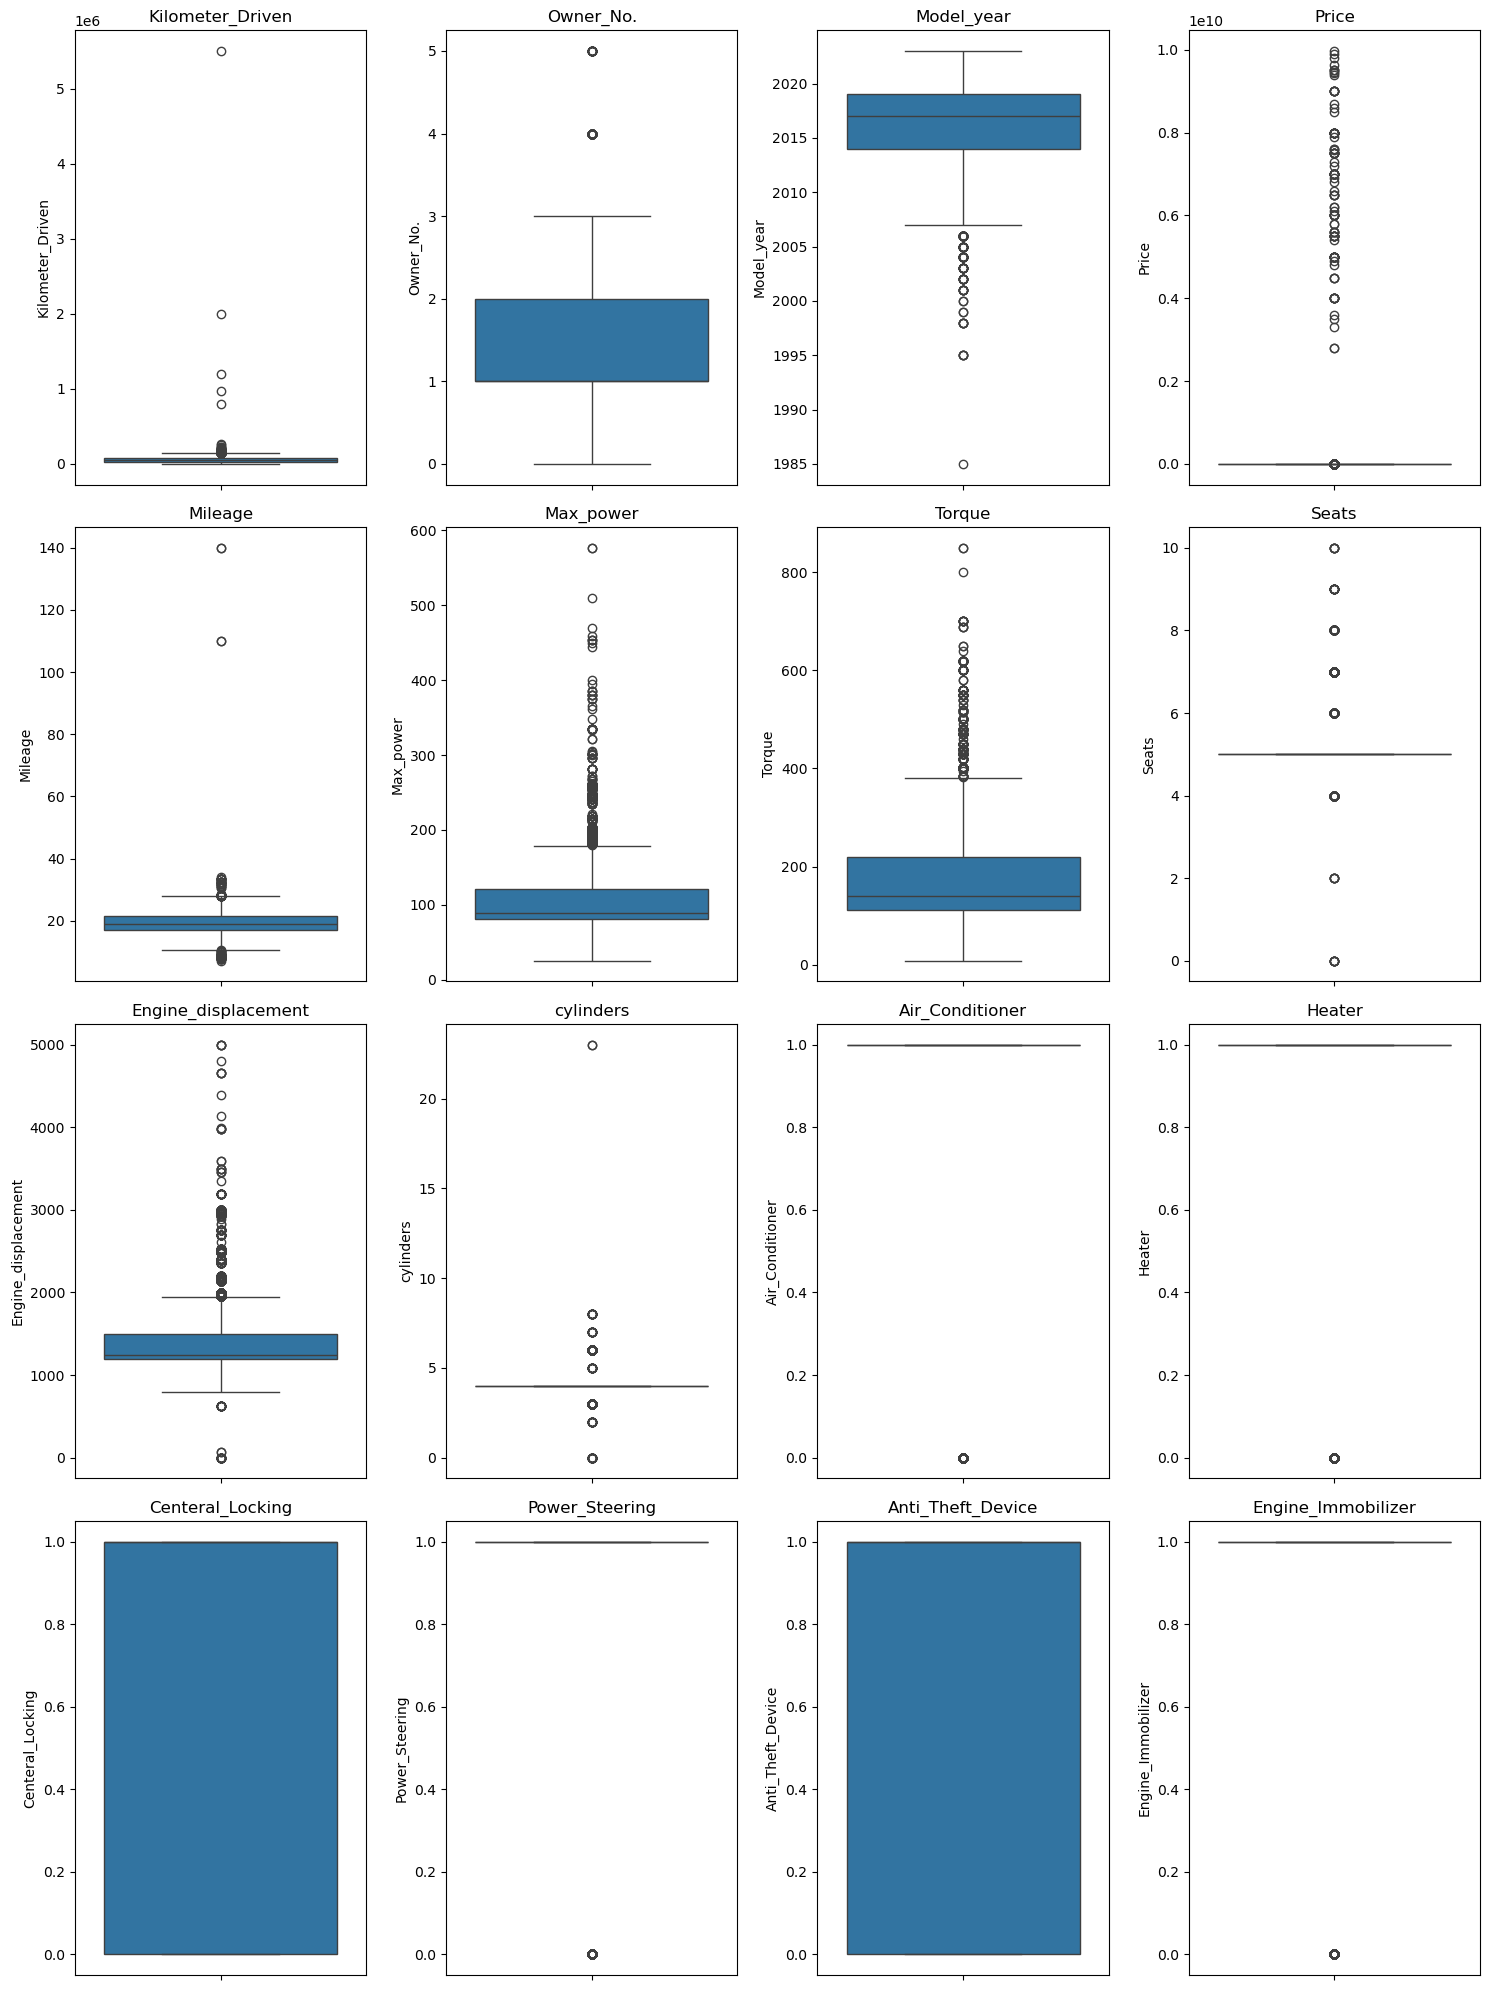

In [182]:
#seeing if outliers are present 
def plot_boxplots(new_data, columns):
    num_cols = len(columns)
    num_rows = int(np.ceil(num_cols / 4))  # Adjust number of rows based on number of columns
    num_cols_subplot = min(num_cols, 4)  # Ensure at most 4 columns per row
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows
    
    for i, column in enumerate(columns):
        plt.subplot(num_rows, num_cols_subplot, i + 1)  # Adjust subplot grid
        sns.boxplot(new_data[column])
        plt.title(column)
    
    plt.tight_layout()
    plt.show()

# Example usage
numerical_cols = new_data.select_dtypes(include=['float', 'int']).columns
plot_boxplots(new_data, numerical_cols)

Skipping box plot for cylinders due to limited variance.
Skipping box plot for Air_Conditioner due to limited variance.
Skipping box plot for Heater due to limited variance.
Skipping box plot for Power_Steering due to limited variance.
Skipping box plot for Engine_Immobilizer due to limited variance.


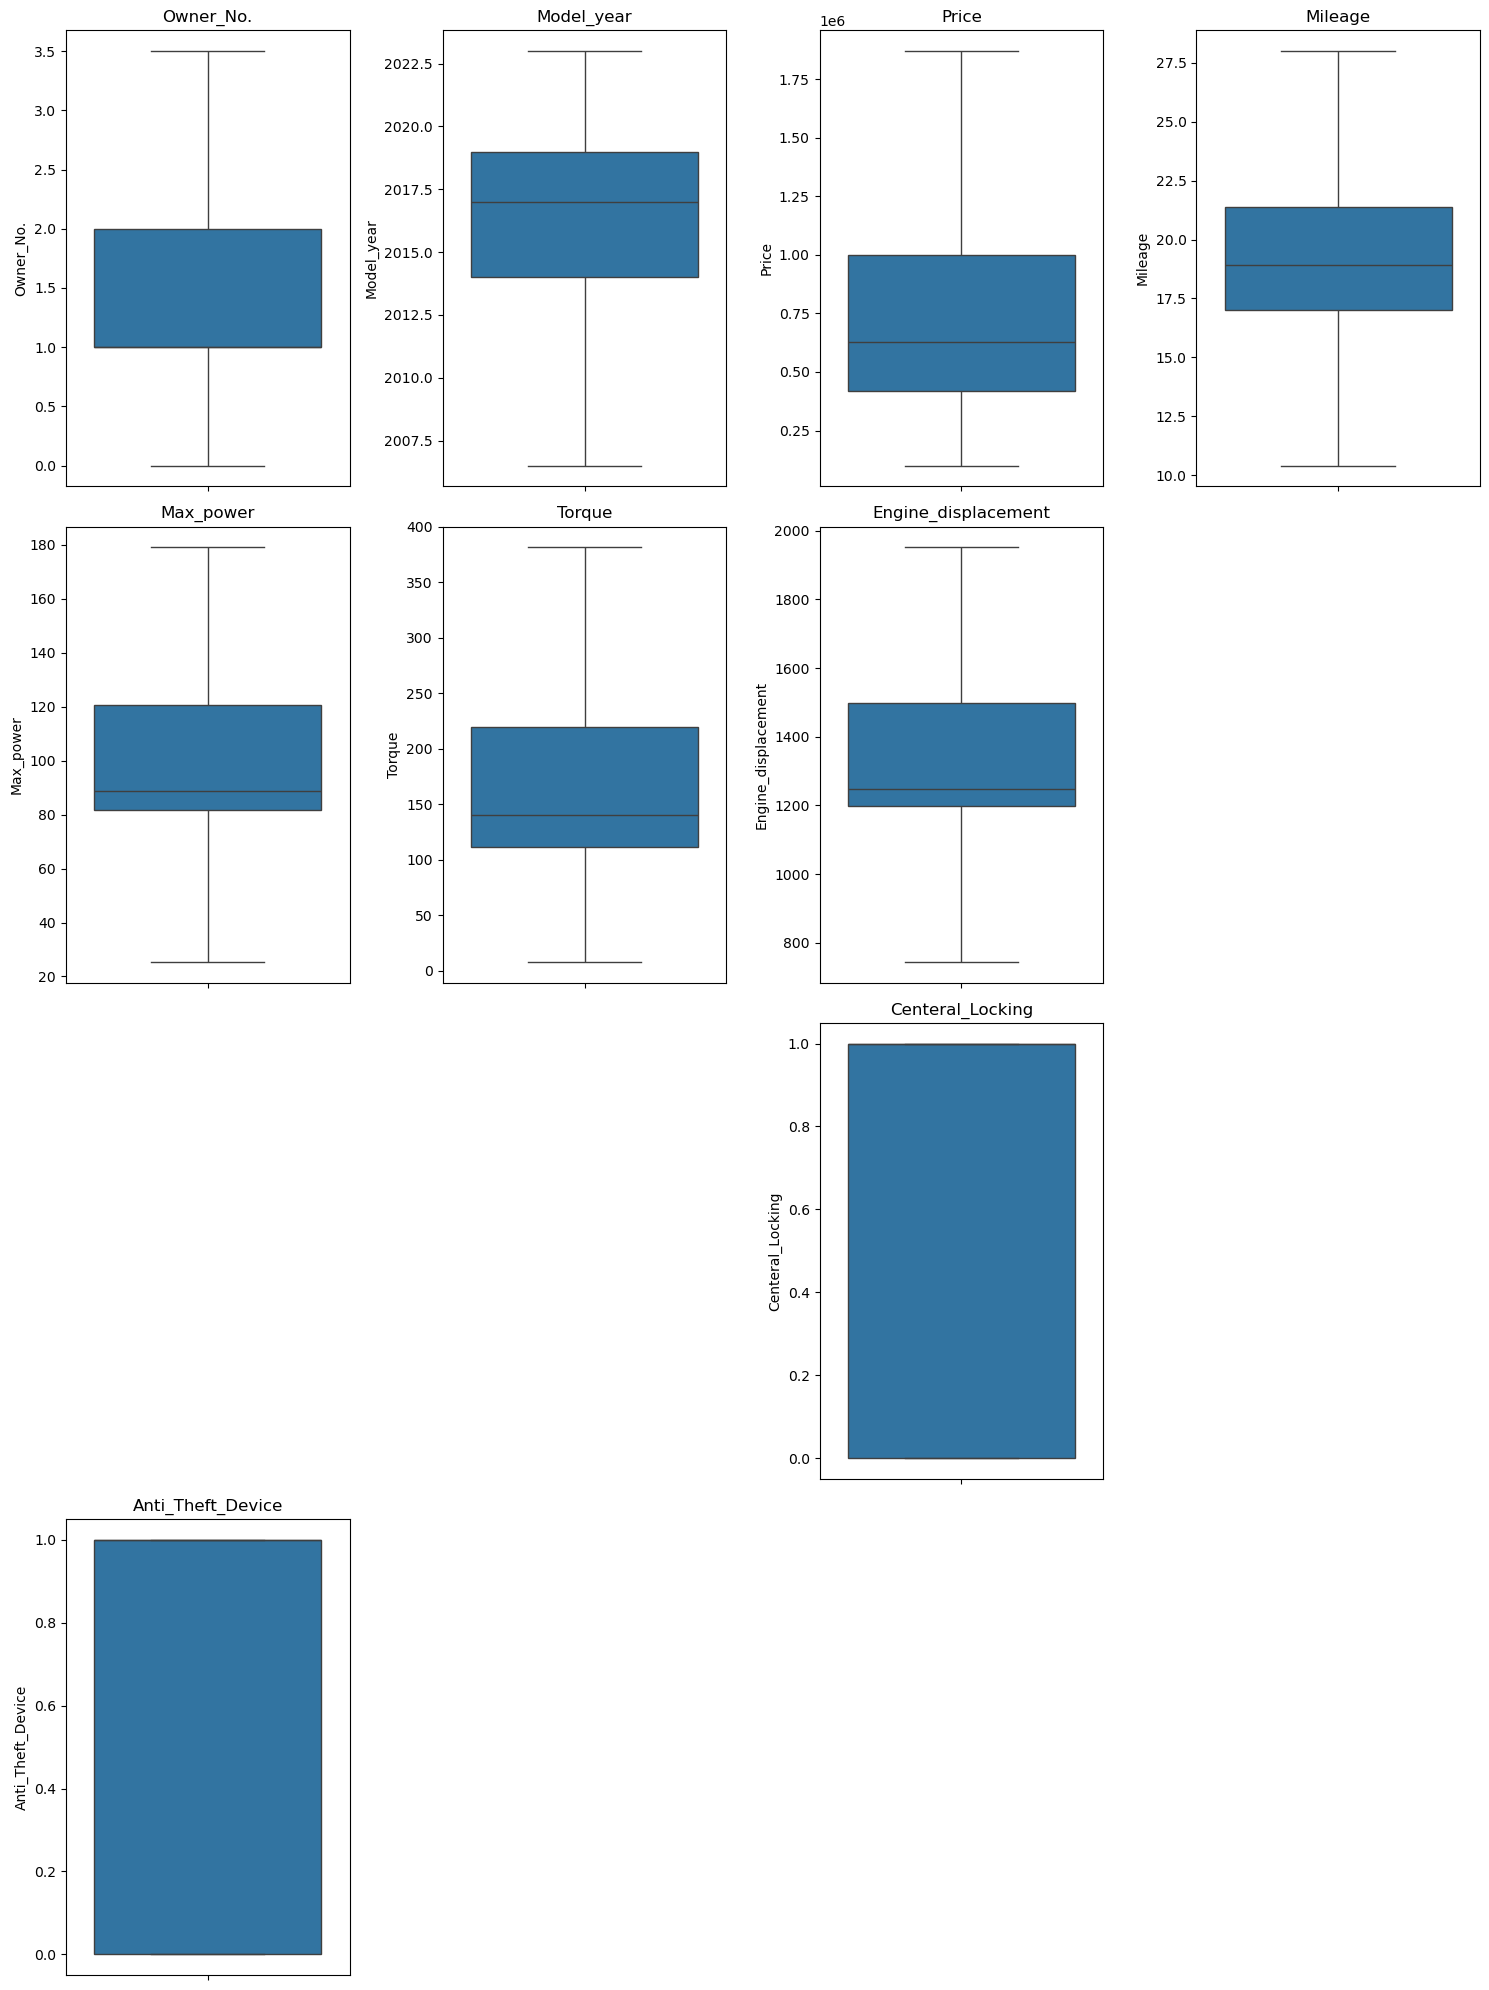

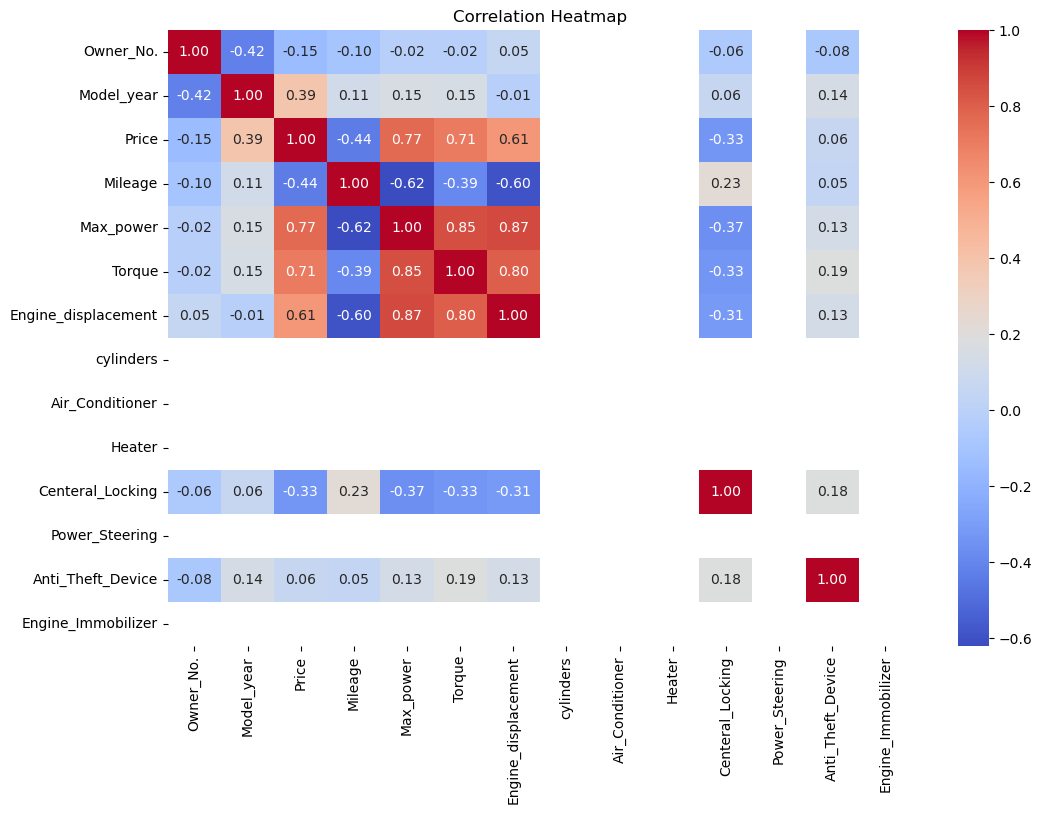

In [184]:
# Function to cap outliers using IQR
def cap_outliers_iqr(new_data, columns):
    for col in columns:
        Q1 = new_data[col].quantile(0.25)
        Q3 = new_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_data[col] = np.clip(new_data[col], lower_bound, upper_bound)
    return new_data

# Box plots to identify outliers
def plot_boxplots(new_data, columns):
    num_cols = len(columns)
    num_rows = int(np.ceil(num_cols / 4))  # Adjust number of rows based on number of columns
    num_cols_subplot = min(num_cols, 4)  # Ensure at most 4 columns per row
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size based on number of rows
   
    for i, column in enumerate(columns):
        if new_data[column].nunique() > 1:  # Skip columns with a single unique value
            plt.subplot(num_rows, num_cols_subplot, i + 1)  # Adjust subplot grid
            sns.boxplot(data=new_data[column])
            plt.title(column)
        else:
            print(f"Skipping box plot for {column} due to limited variance.")
   
    plt.tight_layout()
    plt.show()

# Correlation heatmap
def plot_correlation_heatmap_fix(new_data):
    # Select only numeric columns
    numeric_df = new_data.select_dtypes(include=['float64', 'int64'])
   
    # Remove columns with only NaN values after capping outliers
    numeric_df = numeric_df.dropna(axis=1, how='all')
    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
    
# Example usage
numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns
# Filter columns with a single unique value or low variability
cols_to_plot = [col for col in numeric_cols if new_data[col].nunique() > 1 and new_data[col].std() > 0]
# Cap outliers before plotting
new_data = cap_outliers_iqr(new_data, cols_to_plot)
plot_boxplots(new_data, cols_to_plot)
plot_correlation_heatmap_fix(new_data[cols_to_plot])

Columns with variance <= 0.01 are being skipped: []


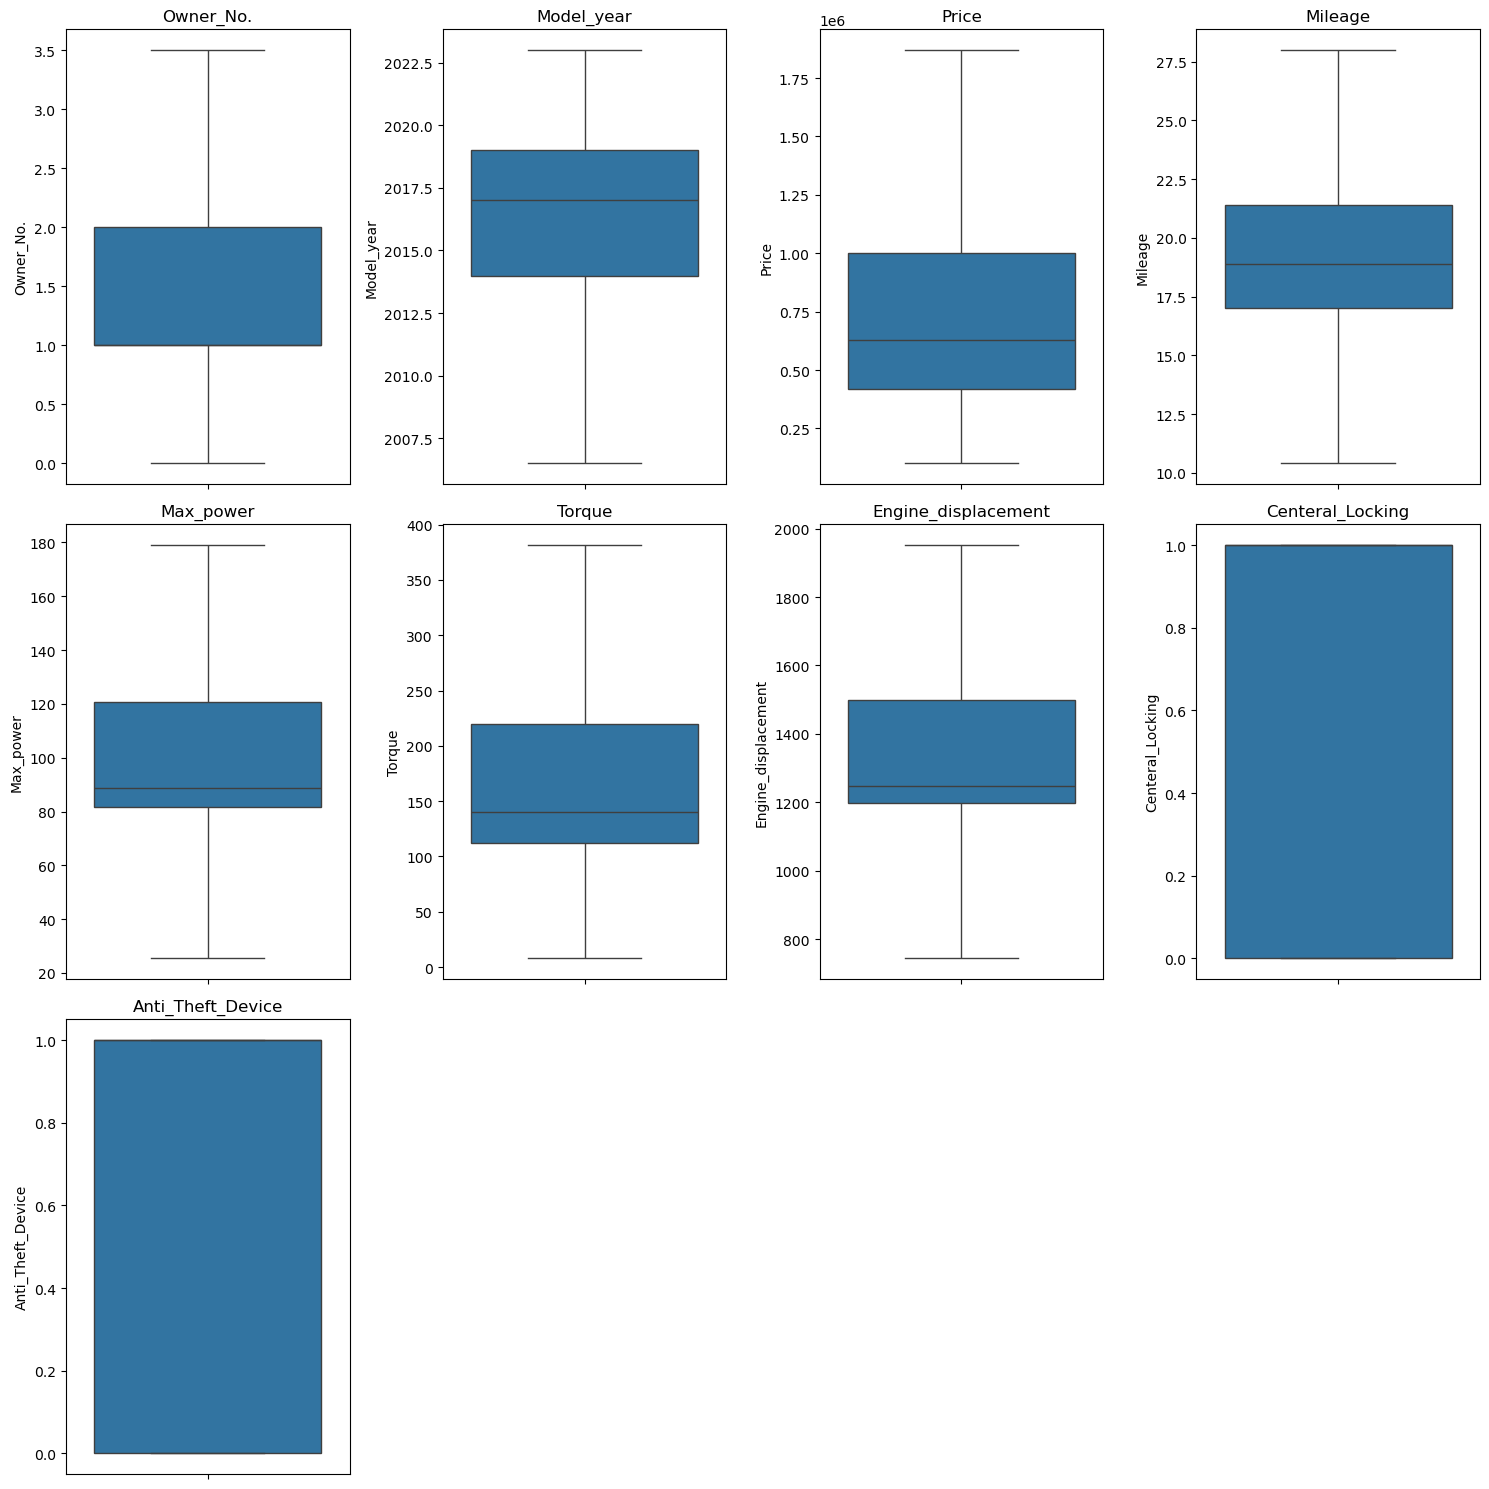

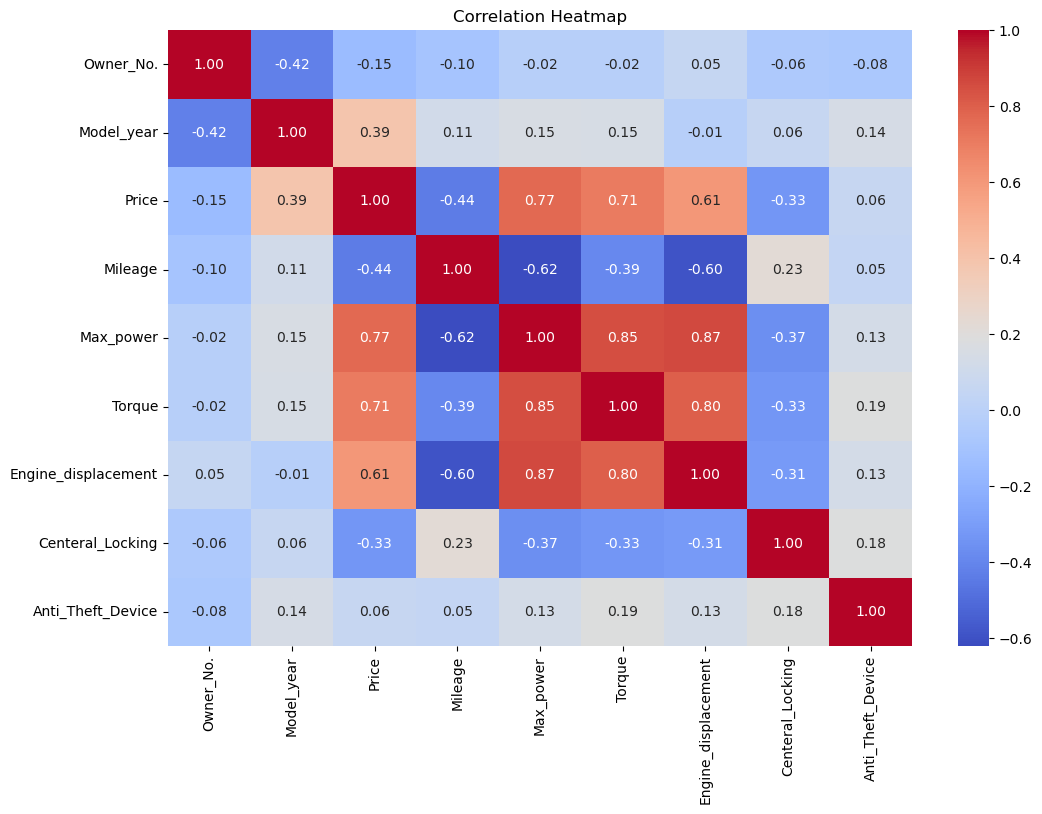

In [186]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to cap outliers using IQR
def cap_outliers_iqr(new_data, columns):
    for col in columns:
        Q1 = new_data[col].quantile(0.25)
        Q3 = new_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_data[col] = np.clip(new_data[col], lower_bound, upper_bound)
    return new_data

# Box plots to identify outliers
def plot_boxplots(new_data, columns):
    skipped_columns = []  # List to track skipped columns
    num_cols = len(columns)
    num_rows = int(np.ceil(num_cols / 4))  # Rows for the subplot grid
    num_cols_subplot = min(num_cols, 4)  # Max 4 subplots per row
    plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size
    
    for i, column in enumerate(columns):
        if new_data[column].nunique() > 1:  # Skip low variance columns
            plt.subplot(num_rows, num_cols_subplot, i + 1)
            sns.boxplot(data=new_data[column])
            plt.title(column)
        else:
            skipped_columns.append(column)
    
    plt.tight_layout()
    plt.show()

    # Print skipped columns
    if skipped_columns:
        print("Skipped box plots for the following columns due to limited variance:")
        print(skipped_columns)

# Correlation heatmap
def plot_correlation_heatmap_fix(new_data):
    numeric_df = new_data.select_dtypes(include=['float64', 'int64'])
    numeric_df = numeric_df.dropna(axis=1, how='all')  # Drop all-NaN columns
    
    plt.figure(figsize=(12, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Variance threshold to identify low-variance columns
def filter_low_variance_columns(new_data, threshold=0.01):
    low_variance_cols = [col for col in new_data.columns if new_data[col].std() <= threshold]
    print(f"Columns with variance <= {threshold} are being skipped: {low_variance_cols}")
    return [col for col in new_data.columns if new_data[col].std() > threshold]

# Example usage
numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns

# Filter columns with a single unique value or low variance
cols_to_plot = [col for col in numeric_cols if new_data[col].nunique() > 1]
cols_to_plot = filter_low_variance_columns(new_data[cols_to_plot], threshold=0.01)

# Cap outliers before plotting
new_data = cap_outliers_iqr(new_data, cols_to_plot)

# Plot boxplots and correlation heatmap
plot_boxplots(new_data, cols_to_plot)
plot_correlation_heatmap_fix(new_data[cols_to_plot])


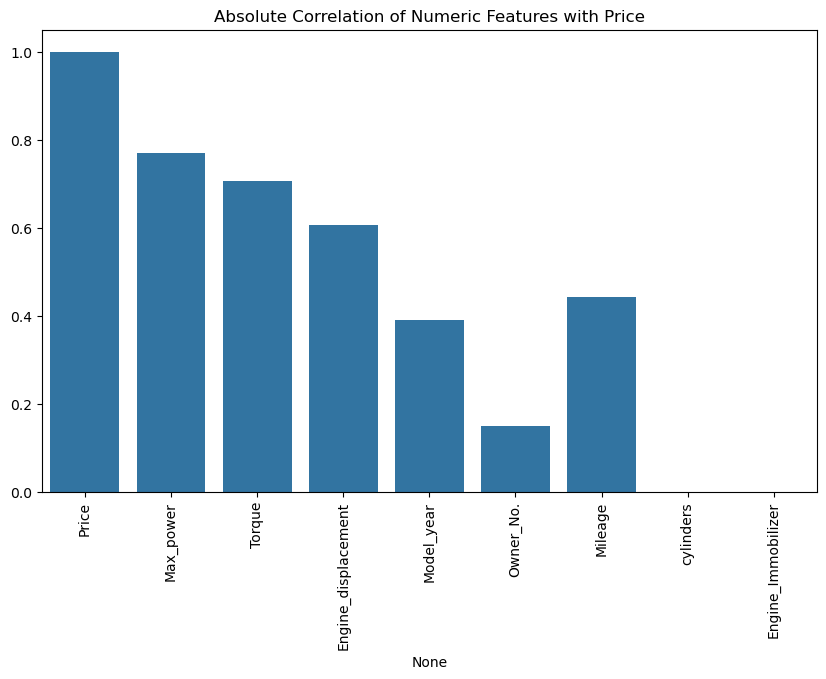

Features with high absolute correlation with Price:
 Price                  1.000000
Max_power              0.770253
Torque                 0.705950
Engine_displacement    0.606371
Model_year             0.389397
Owner_No.              0.149462
Mileage                0.443070
cylinders                   NaN
Engine_Immobilizer          NaN
Name: Price, dtype: float64


In [188]:
# Correlation Analysis with the Target Variable Price
# Select only numeric columns for correlation calculation
numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns
# Exclude specific columns
numeric_cols = [col for col in numeric_cols if col not in ['Air_Conditioner','Centeral_Locking' ,'Power_Steering','Heater','Anti_Theft_Device']]

# Calculate correlation of all numeric features with the target variable 'Price'
correlation_matrix = new_data[numeric_cols].corr()

# Extract correlation with 'Price'
correlation_with_price = correlation_matrix['Price'].sort_values(ascending=False)


# Convert correlation values to absolute for visualization
correlation_with_price_abs = np.abs(correlation_with_price)

# Plot the absolute correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_price_abs.index, y=correlation_with_price_abs.values)
plt.xticks(rotation=90)
plt.title('Absolute Correlation of Numeric Features with Price')
plt.show()

# Print features with high absolute correlation with Price
print("Features with high absolute correlation with Price:\n", correlation_with_price_abs)

In [190]:
new_data.to_csv(r'C:\Users\HP\Desktop\structured_cars_dataset\cleaned_cardata.csv', index=False)


In [192]:
new_data=pd.read_csv(r"C:\Users\HP\Desktop\structured_cars_dataset\cleaned_cardata.csv")

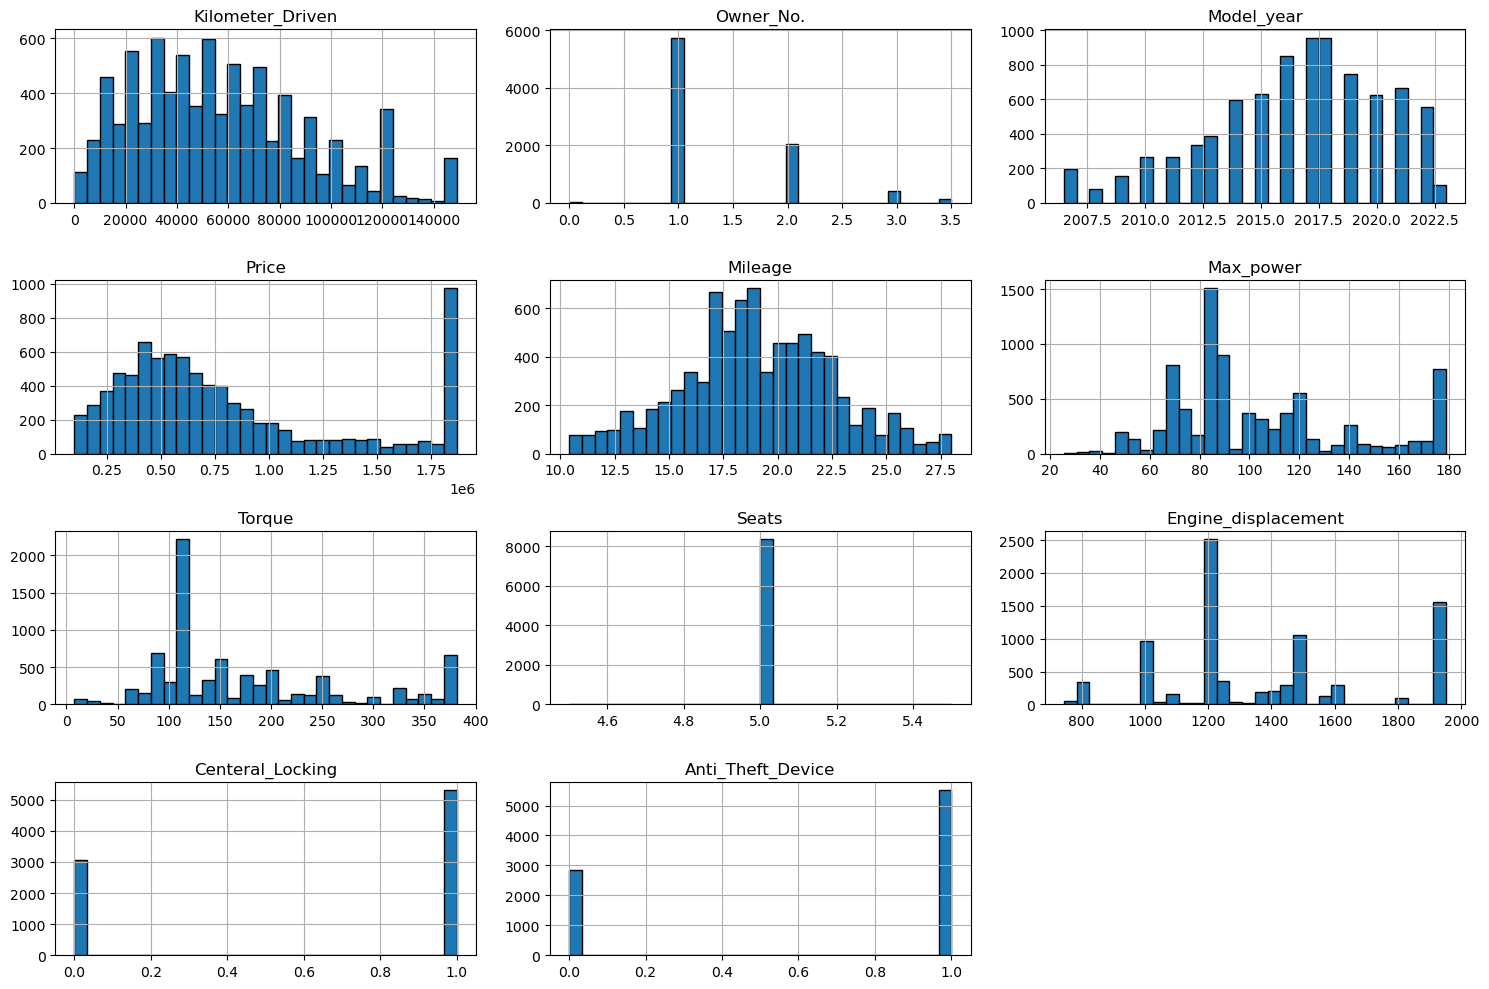

In [257]:
# Example usage
numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns

# Filter columns with a single unique value or low variability
cols_to_plot = [col for col in numeric_cols if new_data[col].nunique() > 1 and new_data[col].std() > 0]

# Cap outliers before plotting
new_data = cap_outliers_iqr(new_data, cols_to_plot)


# Histogram for numerical features
def plot_histograms(new_data, columns):
    new_data[columns].hist(figsize=(15, 10), bins=30, edgecolor='black')
    plt.tight_layout()
    plt.show()
plot_histograms(new_data, cols_to_plot)

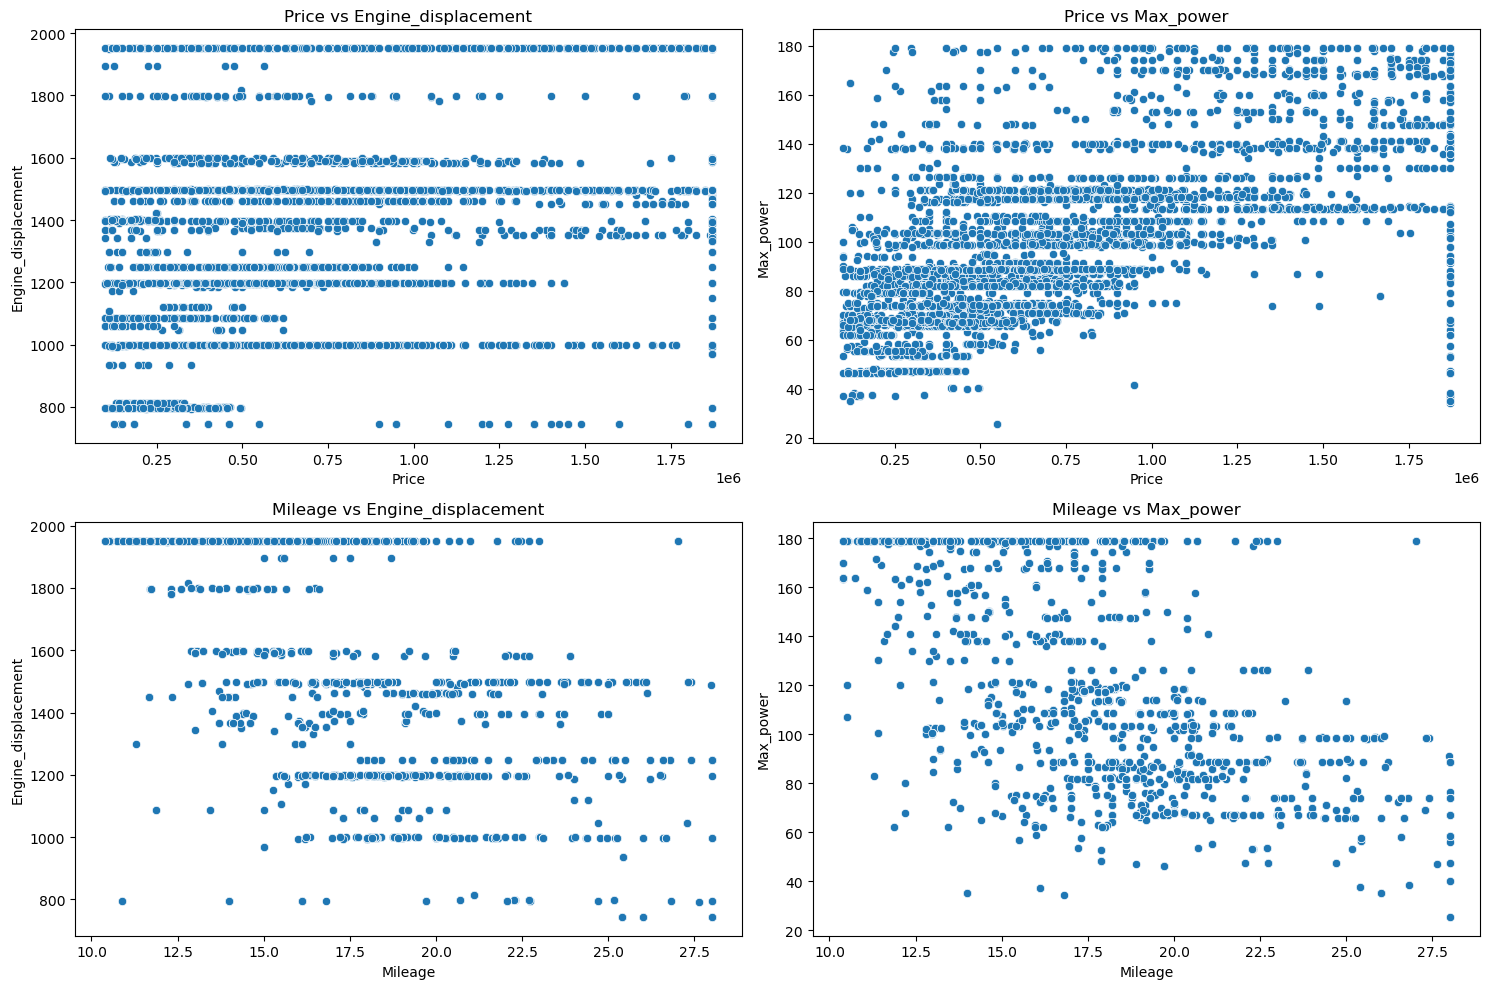

In [194]:
numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns

# Filter columns with a single unique value or low variability
cols_to_plot = [col for col in numeric_cols if new_data[col].nunique() > 1 and new_data[col].std() > 0]

# Cap outliers before plotting
new_data = cap_outliers_iqr(new_data, cols_to_plot)
    # Scatter plots for feature relationships
def plot_scatter_plots(new_data, x_cols, y_cols):
    plt.figure(figsize=(15, 10))
    for i, x in enumerate(x_cols):
        for j, y in enumerate(y_cols):
            plt.subplot(len(x_cols), len(y_cols), i*len(y_cols) + j + 1)
            sns.scatterplot(data=new_data, x=x, y=y)
            plt.title(f'{x} vs {y}')
    plt.tight_layout()
    plt.show()
plot_scatter_plots(new_data, ['Price', 'Mileage'], ['Engine_displacement', 'Max_power'])

In [196]:
# Assuming 'new_data' contains your training data
col= ['Price']
scaler_2 = MinMaxScaler()

# Fit the scaler to your training data
scaler_2.fit(new_data[col])

# Transform the training data (optional, but usually done)
new_data[col] = scaler_2.transform(new_data[col])
new_data

,Fuel_type,Body_type,Kilometer_Driven,Transmission,Owner_No.,Original_equipment_manufacturer,Model,Model_year,Variant_name,Price,Mileage,Max_power,Torque,Seats,Engine_type,Engine_displacement,cylinders,Air_Conditioner,Heater,Centeral_Locking,Power_Steering,Anti_Theft_Device,Engine_Immobilizer,City
0,Petrol,Hatchback,120000,Manual,3.0,Maruti,Maruti Celerio,2015.0,VXI,0.169492,23.10,67.04,90.00,5,K10B Engine,998.0,4.0,1,1,1,1,1,1,Hyderabad
1,Petrol,SUV,32706,Manual,2.0,Ford,Ford Ecosport,2018.0,1.5 Petrol Titanium BSIV,0.401695,17.00,121.31,150.00,5,Ti-VCT Petrol Engine,1497.0,4.0,1,1,1,1,1,1,Hyderabad
2,Petrol,Hatchback,11949,Manual,1.0,Tata,Tata Tiago,2018.0,1.2 Revotron XZ,0.274011,23.84,84.00,114.00,5,Revotron Engine,1199.0,4.0,1,1,1,1,1,1,Hyderabad
3,Petrol,Sedan,17794,Manual,1.0,Hyundai,Hyundai Xcent,2014.0,1.2 Kappa S Option,0.204520,19.10,81.86,113.75,5,Kappa VTVT Petrol Engine,1197.0,4.0,1,1,1,1,1,1,Hyderabad
4,Diesel,SUV,60000,Manual,1.0,Maruti,Maruti SX4 S Cross,2015.0,DDiS 200 Zeta,0.389831,23.65,88.50,200.00,5,DDiS 200 Diesel Engine,1248.0,4.0,1,1,1,1,1,1,Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,Diesel,SUV,148995,Manual,2.0,Toyota,Toyota Fortuner,2012.0,4x4 MT,0.875141,12.55,168.50,343.00,5,D-4D Diesel Engine,1952.0,4.0,1,1,0,1,1,1,Bangalore
8363,Petrol,Sedan,56000,Manual,2.0,Maruti,Maruti SX4,2008.0,Zxi BSIII,0.129944,15.00,104.68,145.00,5,In-Line Engine,1586.0,4.0,1,1,0,1,0,1,Bangalore
8364,Petrol,Hatchback,42000,Manual,2.0,Honda,Honda Brio,2014.0,S MT,0.183616,19.40,86.80,109.00,5,i-VTEC Engine,1198.0,4.0,1,1,1,1,1,1,Bangalore
8365,Diesel,Hatchback,93003,Manual,1.0,Hyundai,Hyundai i20,2018.0,1.4 Asta Dual Tone,0.367232,22.54,88.73,219.70,5,U2 CRDI Diesel Engine,1396.0,4.0,1,1,1,1,1,1,Bangalore


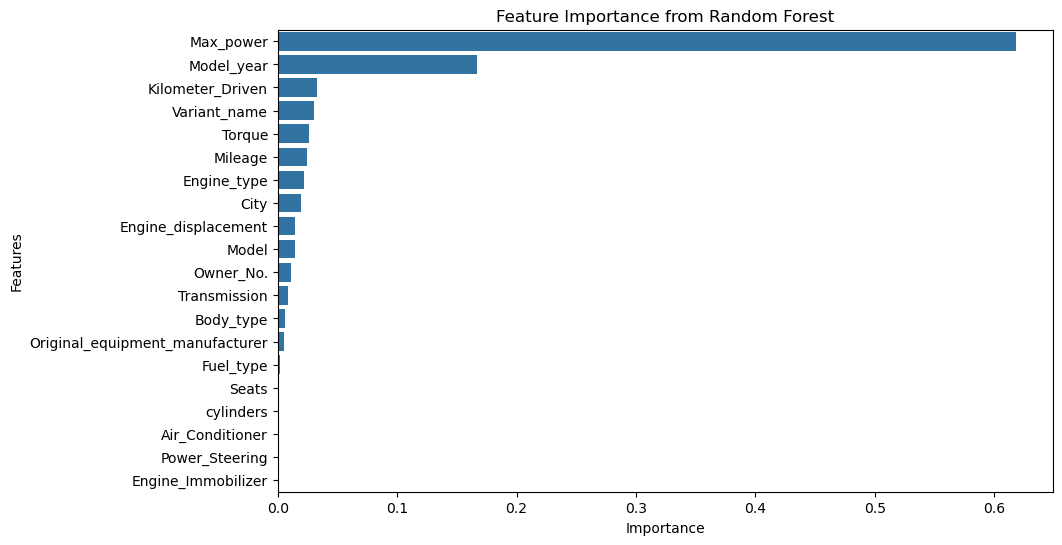

Top features based on importance:
 Max_power                          0.618257
Model_year                         0.166989
Kilometer_Driven                   0.033072
Variant_name                       0.029982
Torque                             0.025739
Mileage                            0.024347
Engine_type                        0.021548
City                               0.019194
Engine_displacement                0.014754
Model                              0.014263
Owner_No.                          0.011125
Transmission                       0.008448
Body_type                          0.005662
Original_equipment_manufacturer    0.004906
Fuel_type                          0.001714
Seats                              0.000000
cylinders                          0.000000
Air_Conditioner                    0.000000
Power_Steering                     0.000000
Engine_Immobilizer                 0.000000
dtype: float64


In [198]:
# Feature Importance using Random Forest

# Preprocessing: Encoding categorical features (use LabelEncoder for simplicity)
categorical_columns = new_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    new_data[col] = le.fit_transform(new_data[col].astype(str))
    label_encoders[col] = le

# Define features (X) and target (y)
X = new_data.drop(['Price','Heater' , 'Anti_Theft_Device','Centeral_Locking'], axis=1)  # Exclude specific columns
y = new_data['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Calculate feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Print the top features
print("Top features based on importance:\n", feature_importance)

In [200]:
selected_features=[ 'Mileage','Model_year','Kilometer_Driven','Engine_displacement', 'Fuel_type','Model', 
    'Transmission', 'Owner_No.','Body_type','City','Max_power' ]
# Ensure the dataset contains only the selected features along with the target variable 'Price'
final_data = new_data[selected_features + ['Price']]

# Display the final dataframe to verify
final_data.head()

,Mileage,Model_year,Kilometer_Driven,Engine_displacement,Fuel_type,Model,Transmission,Owner_No.,Body_type,City,Max_power,Price
0,23.10,2015.0,120000,998.0,4,152,1,3.0,2,3,67.04,0.169492
1,17.00,2018.0,32706,1497.0,4,48,1,2.0,7,3,121.31,0.401695
2,23.84,2018.0,11949,1199.0,4,261,1,1.0,2,3,84.00,0.274011
3,19.10,2014.0,17794,1197.0,4,83,1,1.0,8,3,81.86,0.204520
4,23.65,2015.0,60000,1248.0,1,170,1,1.0,7,3,88.50,0.389831


In [202]:
#1. Train-Test Split
# Separate features (X) and target (y)
X = final_data.drop('Price', axis=1)
y = final_data['Price']

# Perform the train-test split (using 80-20 ratio here)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Linear Regression Model :

In [204]:
from sklearn.impute import SimpleImputer

# Imputation for missing values
imputer = SimpleImputer(strategy='mean')  # or use 'median' for numerical data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit and evaluate the model again
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_lr = lr_model.predict(X_test_imputed)

# Model Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')


Linear Regression CV Mean MSE: 0.02913395329340655
Linear Regression - MSE: 0.021165152200637402, MAE: 0.09580182176667656, R²: 0.7407478267371462


In [275]:
# Drop rows with missing values from both X_train and y_train
X_train_dropped = X_train.dropna()
y_train_dropped = y_train[X_train_dropped.index]

X_test_dropped = X_test.dropna()
y_test_dropped = y_test[X_test_dropped.index]

# Fit and evaluate the model again
lr_model = LinearRegression()
lr_model.fit(X_train_dropped, y_train_dropped)

# Cross-Validation
cv_scores = cross_val_score(lr_model, X_train_dropped, y_train_dropped, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_lr = lr_model.predict(X_test_dropped)

# Model Evaluation
mse_lr = mean_squared_error(y_test_dropped, y_pred_lr)
mae_lr = mean_absolute_error(y_test_dropped, y_pred_lr)
r2_lr = r2_score(y_test_dropped, y_pred_lr)

print(f'Linear Regression - MSE: {mse_lr}, MAE: {mae_lr}, R²: {r2_lr}')


Linear Regression CV Mean MSE: 0.02596288733622761
Linear Regression - MSE: 0.01849453608874287, MAE: 0.0902609620257931, R²: 0.7599734400446495


In [206]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Initialize the HistGradientBoostingRegressor
hb_model = HistGradientBoostingRegressor()

# Fit and evaluate the model with NaN values
hb_model.fit(X_train, y_train)

# Cross-Validation
cv_scores = cross_val_score(hb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'HistGradientBoosting CV Mean MSE: {-cv_scores.mean()}')

# Model Prediction
y_pred_hb = hb_model.predict(X_test)

# Model Evaluation
mse_hb = mean_squared_error(y_test, y_pred_hb)
mae_hb = mean_absolute_error(y_test, y_pred_hb)
r2_hb = r2_score(y_test, y_pred_hb)

print(f'HistGradientBoosting - MSE: {mse_hb}, MAE: {mae_hb}, R²: {r2_hb}')


HistGradientBoosting CV Mean MSE: 0.013459120963236745
HistGradientBoosting - MSE: 0.008803444366422617, MAE: 0.051158836573925566, R²: 0.8921665168027963


In [ ]:
Gradient Boosting with Cross-Validation and Hyperparameter Tuning (Random Search)

Gradient Boosting CV Mean MSE: 0.01567392731645332
Gradient Boosting - MSE: 0.011388256868478807, MAE: 0.06305167170486456, R²: 0.8605051211141379


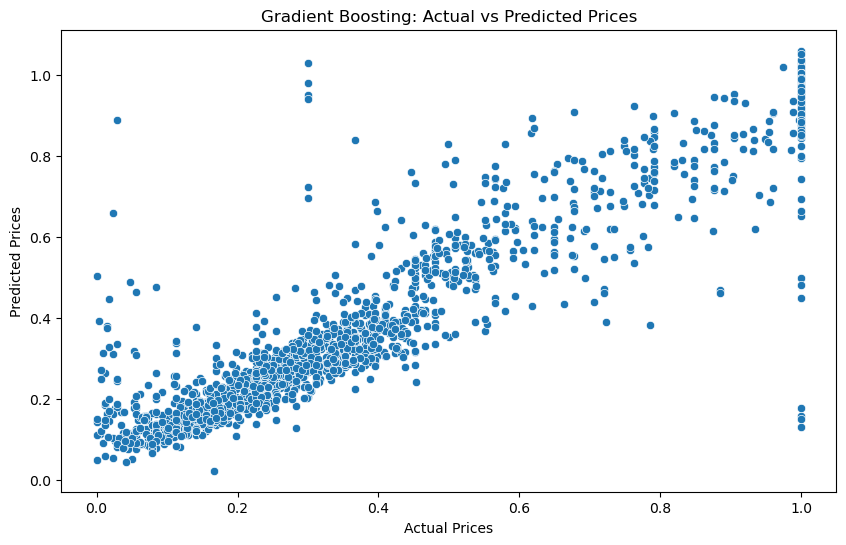

Best Gradient Boosting Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05}


In [208]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values with mean strategy (you can also use median or other strategies)
imputer = SimpleImputer(strategy='mean')  # or 'median' if preferred
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Model Training with Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_imputed, y_train)

# Cross-Validation
gbr_cv_scores = cross_val_score(gbr_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Gradient Boosting CV Mean MSE: {-gbr_cv_scores.mean()}')

# Model Prediction
y_pred_gbr = gbr_model.predict(X_test_imputed)

# Model Evaluation
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f'Gradient Boosting - MSE: {mse_gbr}, MAE: {mae_gbr}, R²: {r2_gbr}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gbr)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
gbr_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}
gbr_random = RandomizedSearchCV(gbr_model, gbr_params, n_iter=20, cv
                                =5, scoring='neg_mean_squared_error', random_state=42)
gbr_random.fit(X_train_imputed, y_train)

print(f'Best Gradient Boosting Params: {gbr_random.best_params_}')


In [ ]:
DecisionTree with Cross-Validation and Hyperparameter Tuning

Decision Tree CV Mean MSE: 0.020652007825009654
Decision Tree - MSE: 0.015762549912917572, MAE: 0.0847183533910817, R²: 0.8069243593266


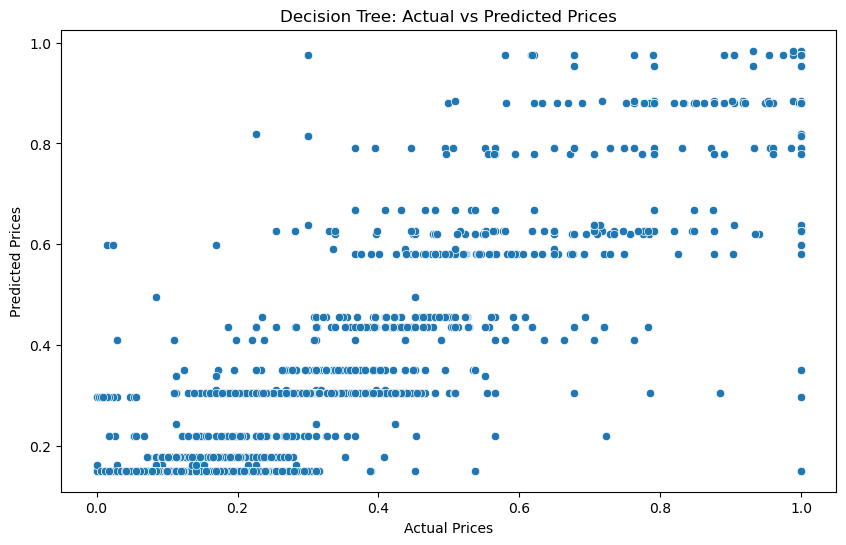

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [209]:
from sklearn.model_selection import GridSearchCV
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Pruning
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Cross-Validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Decision Tree CV Mean MSE: {-dt_cv_scores.mean()}')

# Model Prediction
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Grid Search
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)

print(f'Best Decision Tree Params: {dt_grid.best_params_}')

DecisionTree with Cross-Validation and Hyperparameter Tuning

Decision Tree CV Mean MSE: 0.020652007825009654
Decision Tree - MSE: 0.015762549912917572, MAE: 0.0847183533910817, R²: 0.8069243593266


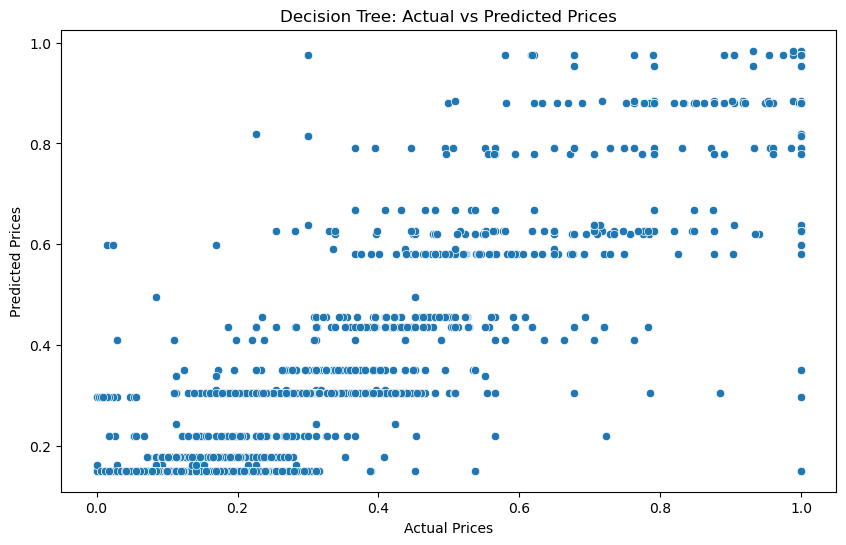

Best Decision Tree Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [212]:
from sklearn.model_selection import GridSearchCV
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Pruning
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Cross-Validation
dt_cv_scores = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Decision Tree CV Mean MSE: {-dt_cv_scores.mean()}')

# Model Prediction
y_pred_dt = dt_model.predict(X_test)

# Model Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree - MSE: {mse_dt}, MAE: {mae_dt}, R²: {r2_dt}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Decision Tree: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Grid Search
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid.fit(X_train, y_train)
print(f'Best Decision Tree Params: {dt_grid.best_params_}')

In [ ]:
Random Forest with Cross-Validation and Hyperparameter Tuning (Random Search)

Random Forest CV Mean MSE: 0.01328057091485165
Random Forest - MSE: 0.009173827118882403, MAE: 0.04896784451078691, R²: 0.8876296945487431


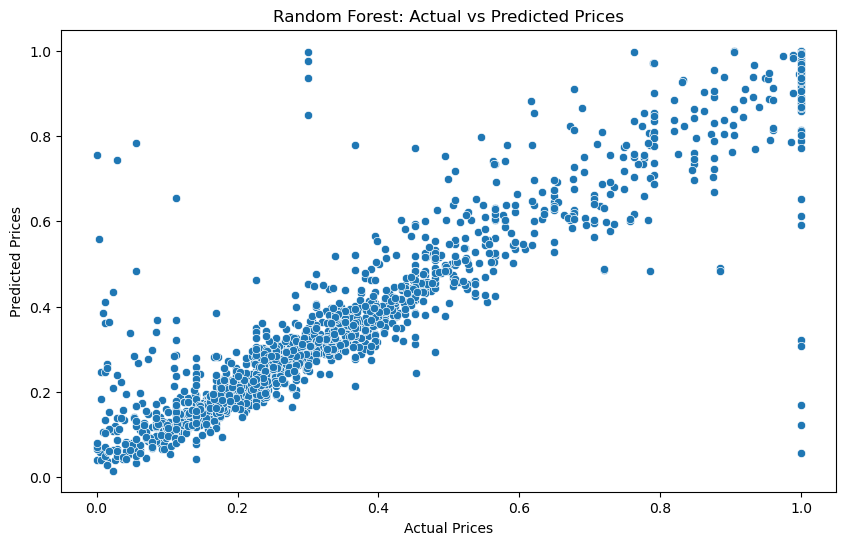

Best Random Forest Params: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': True}


In [214]:
# Model Training with Bagging
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model Prediction
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')

# Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

# Hyperparameter Tuning using Random Search
rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_random = RandomizedSearchCV(rf_model, rf_params, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_random.fit(X_train, y_train)

print(f'Best Random Forest Params: {rf_random.best_params_}')

In [216]:
# Store model evaluation metrics
model_results = {
    'Model': ['Linear Regression', 'Gradient Boosting', 'Decision Tree', 'Random Forest'],
    'MSE': [mse_lr, mse_gbr, mse_dt, mse_rf],
    'MAE': [mae_lr, mae_gbr, mae_dt, mae_rf],
    'R²': [r2_lr, r2_gbr, r2_dt, r2_rf]
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(model_results)

# Display the Model Comparison Table
print("Model Comparison Table:")
print(comparison_df)

# Identify the best model based on the highest R² and the lowest MSE/MAE
best_model_idx = comparison_df['R²'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_model_mse = comparison_df.loc[best_model_idx, 'MSE']
best_model_mae = comparison_df.loc[best_model_idx, 'MAE']
best_model_r2 = comparison_df.loc[best_model_idx, 'R²']

# Print the summary of the best model
print("\nBest Model Summary:")
print(f"Best Model: {best_model_name}")
print(f"MSE: {best_model_mse}")
print(f"MAE: {best_model_mae}")
print(f"R²: {best_model_r2}")

Model Comparison Table:
               Model       MSE       MAE        R²
0  Linear Regression  0.021165  0.095802  0.740748
1  Gradient Boosting  0.011388  0.063052  0.860505
2      Decision Tree  0.015763  0.084718  0.806924
3      Random Forest  0.009174  0.048968  0.887630

Best Model Summary:
Best Model: Random Forest
MSE: 0.009173827118882403
MAE: 0.04896784451078691
R²: 0.8876296945487431


In [218]:
best_rf_model = rf_random.best_estimator_

# Save the best model to a file for future use
joblib.dump(best_rf_model, 'best_random_forest_model1.pkl')
print("Best Random Forest model saved as 'best_random_forest_model.pkl'")

Best Random Forest model saved as 'best_random_forest_model.pkl'


In [220]:
import joblib
joblib.dump(label_encoders,'label_encoder.pkl')
joblib.dump(scaler_2,'min_max.pkl')

['min_max.pkl']

C:\Users\HP\AppData\Local\Temp\ipykernel_8640\3691125540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:,'Car_Age'] = 2024 - final_data['Model_year']
C:\Users\HP\AppData\Local\Temp\ipykernel_8640\3691125540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data.loc[:,'Mileage_normalized'] = final_data['Mileage'] / final_data['Car_Age']


Random Forest CV Mean MSE: 0.014148013242785487
Random Forest - MSE: 0.009055842293920362, MAE: 0.04948021025173546, R²: 0.8890748919181495
Training Time: 86.8396258354187 seconds


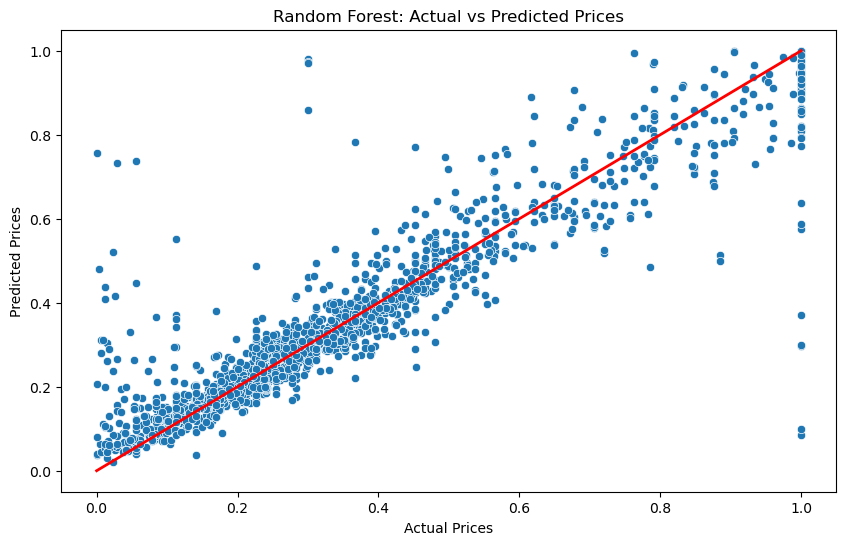

In [222]:
import time
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

# Create 'Car_Age' feature and normalize mileage
final_data.loc[:,'Car_Age'] = 2024 - final_data['Model_year']
final_data.loc[:,'Mileage_normalized'] = final_data['Mileage'] / final_data['Car_Age']

# Check if columns exist before dropping
columns_to_drop = ['Price','Seats']
existing_columns_to_drop = [col for col in columns_to_drop if col in final_data.columns]

# Prepare data for model training
X = final_data.drop(existing_columns_to_drop, axis=1)
y = final_data['Price']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model with RandomizedSearchCV
rf_model = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

start_time = time.time()
rf_random = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)
end_time = time.time()

# Best model
final_model = rf_random.best_estimator_

# Cross-validation
rf_cv_scores = cross_val_score(final_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
print(f'Random Forest CV Mean MSE: {-rf_cv_scores.mean()}')

# Model prediction
y_pred_rf = final_model.predict(X_test)

# Model evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MSE: {mse_rf}, MAE: {mae_rf}, R²: {r2_rf}')
print(f'Training Time: {end_time - start_time} seconds')

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.show()

In [224]:
 # Save the final model to a file for future use
joblib.dump(final_model, 'final_random_forest_model1.pkl')
print("Best Random Forest model saved as 'final_random_forest_model.pkl'")

Best Random Forest model saved as 'final_random_forest_model.pkl'


In [228]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Create an imputer to replace NaNs with the mean of each column
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Ridge (L2) Regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_imputed, y_train)
ridge_pred = ridge.predict(X_test_imputed)
print(f"Ridge Regression MSE: {mean_squared_error(y_test, ridge_pred)}")

# Lasso (L1) Regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_imputed, y_train)
lasso_pred = lasso.predict(X_test_imputed)
print(f"Lasso Regression MSE: {mean_squared_error(y_test, lasso_pred)}")


Ridge Regression MSE: 0.021201823135699745
Lasso Regression MSE: 0.025890058363246926


In [232]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target
X = final_data.drop(['Price'], axis=1, errors='ignore')
y = final_data['Price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

# Create a pipeline for each model, including imputation
for name, model in models.items():
    pipeline = make_pipeline(
        SimpleImputer(strategy='mean'),  # Impute missing values with the mean
        model
    )
    
    # Train and evaluate the model
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"{name} MSE: {mse}")


Random Forest MSE: 0.00964503695540536
Ridge Regression MSE: 0.020595639275632308
Lasso Regression MSE: 0.025226867118275164


In [ ]:
RANDOM FOREST REGRESSOR GIVE BEST PREDICTION COMPARE TO OTHER MODELS.SO WE SAVE THE FINALISED RANDOM FORESTMODEL FOR FUTURE USE .